<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [3]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [4]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
data.shape

(303, 14)

In [6]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [7]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [8]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

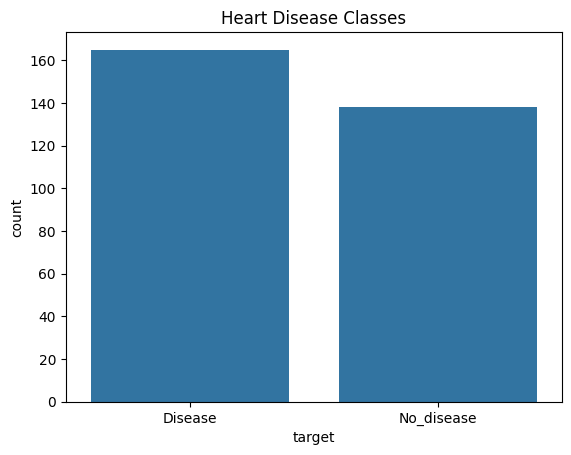

In [9]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

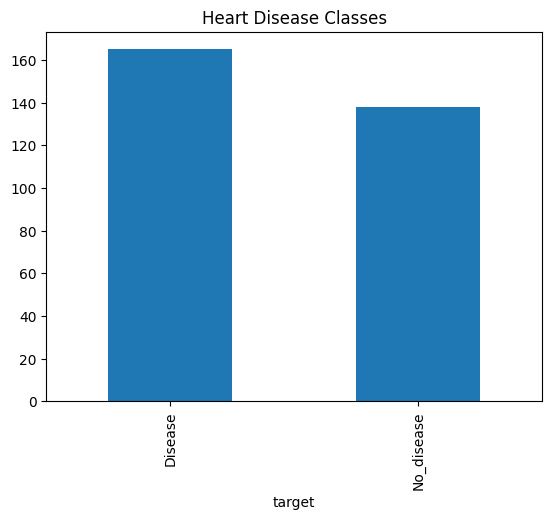

In [10]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

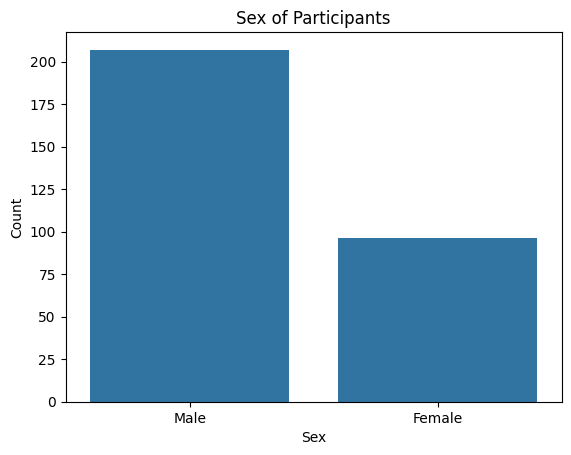

In [11]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts().values)
plt.title('Sex of Participants')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


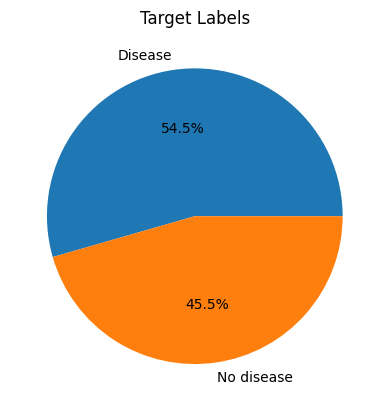

In [12]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

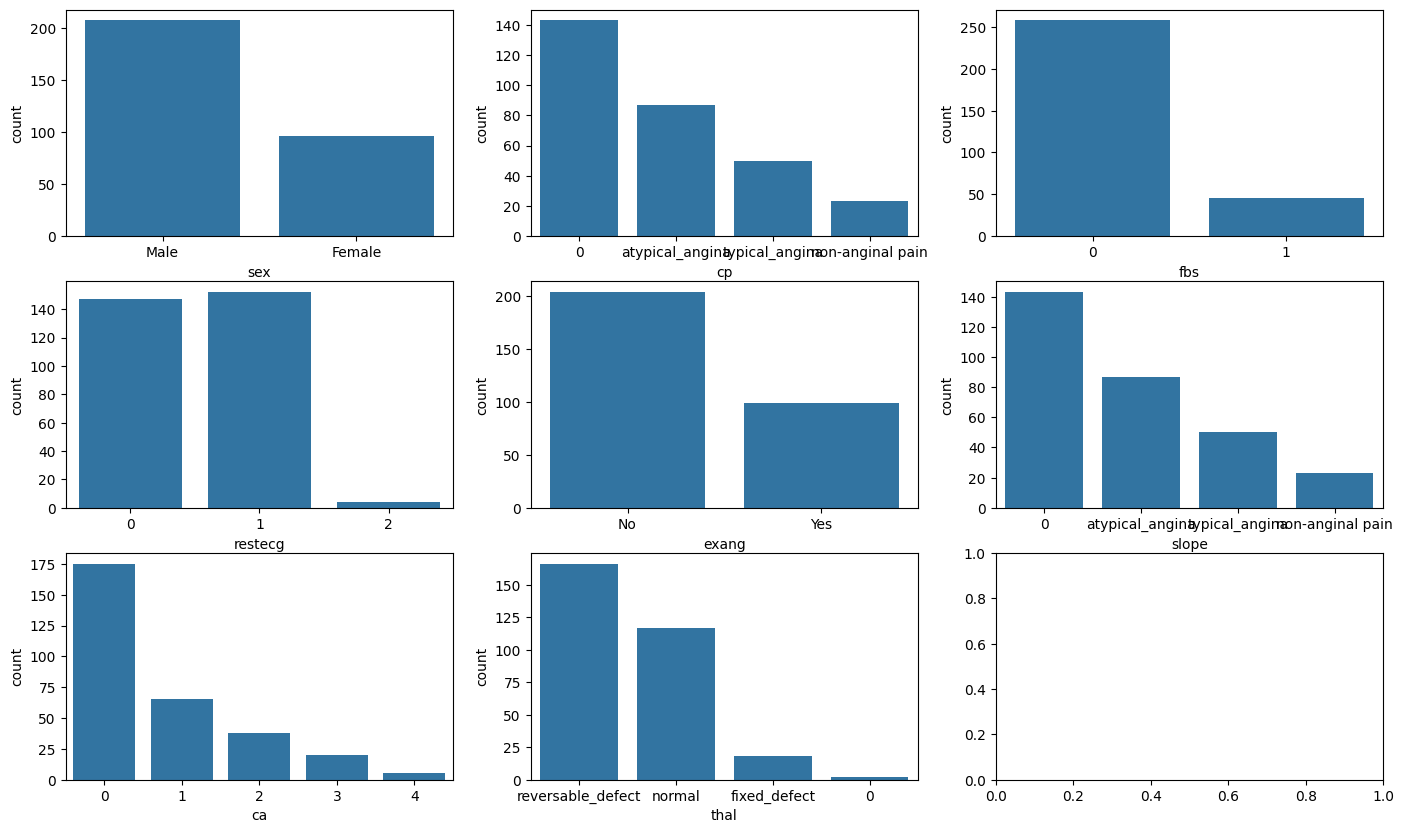

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

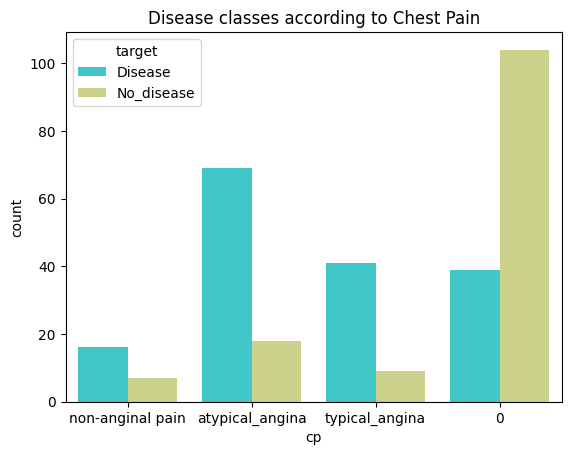

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

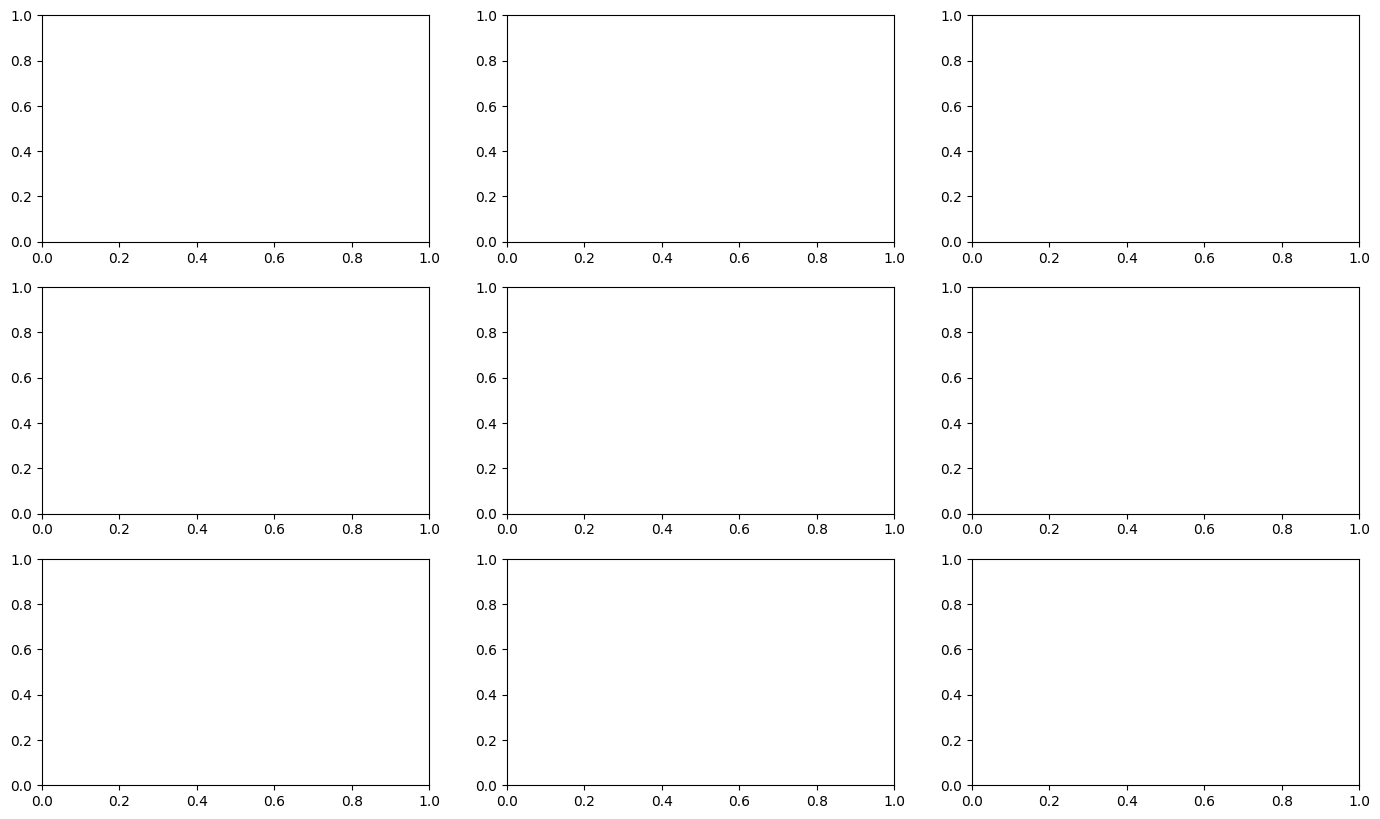

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


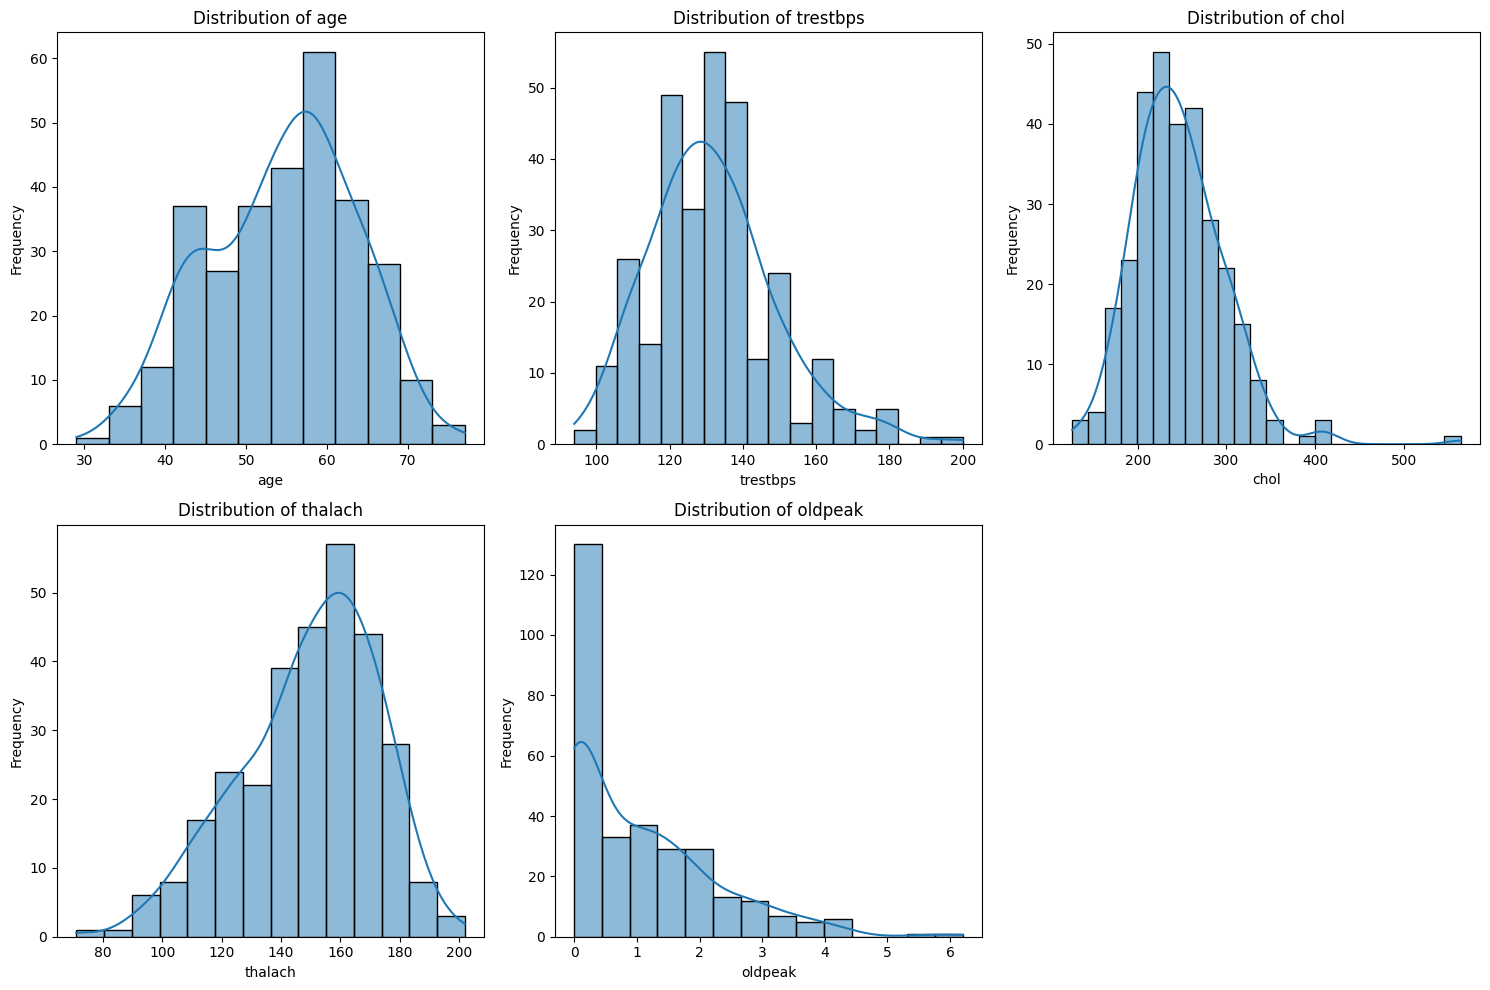

In [ ]:
# Visualising the distribution of the continous variables
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


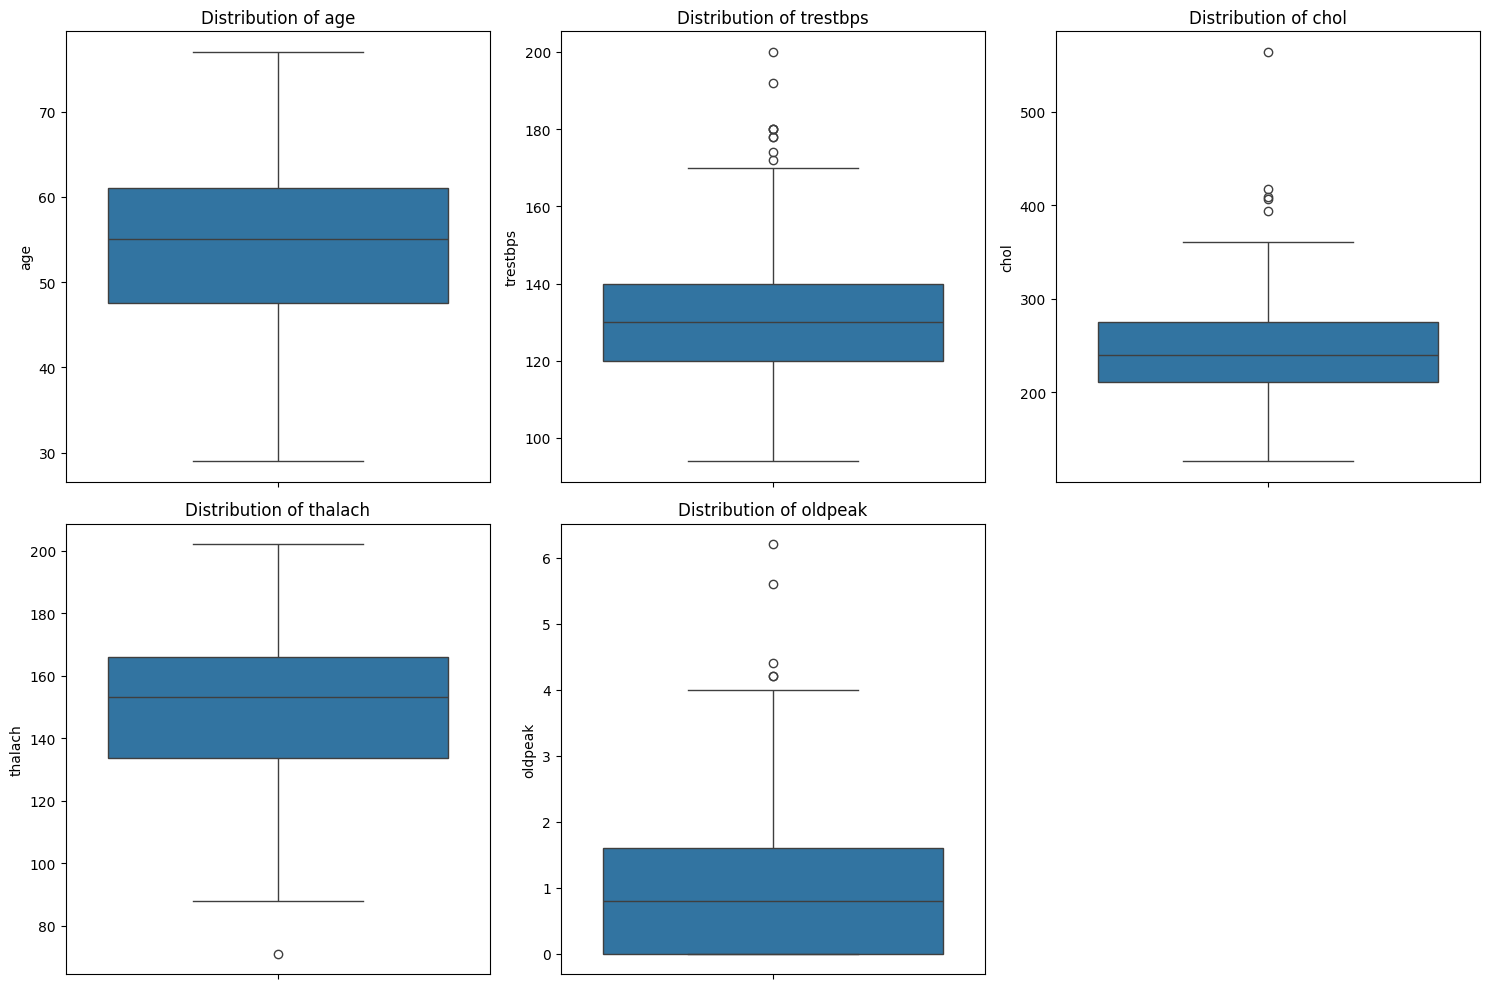

In [ ]:
# Plot boxplots for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[var])
    plt.title(f'Distribution of {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


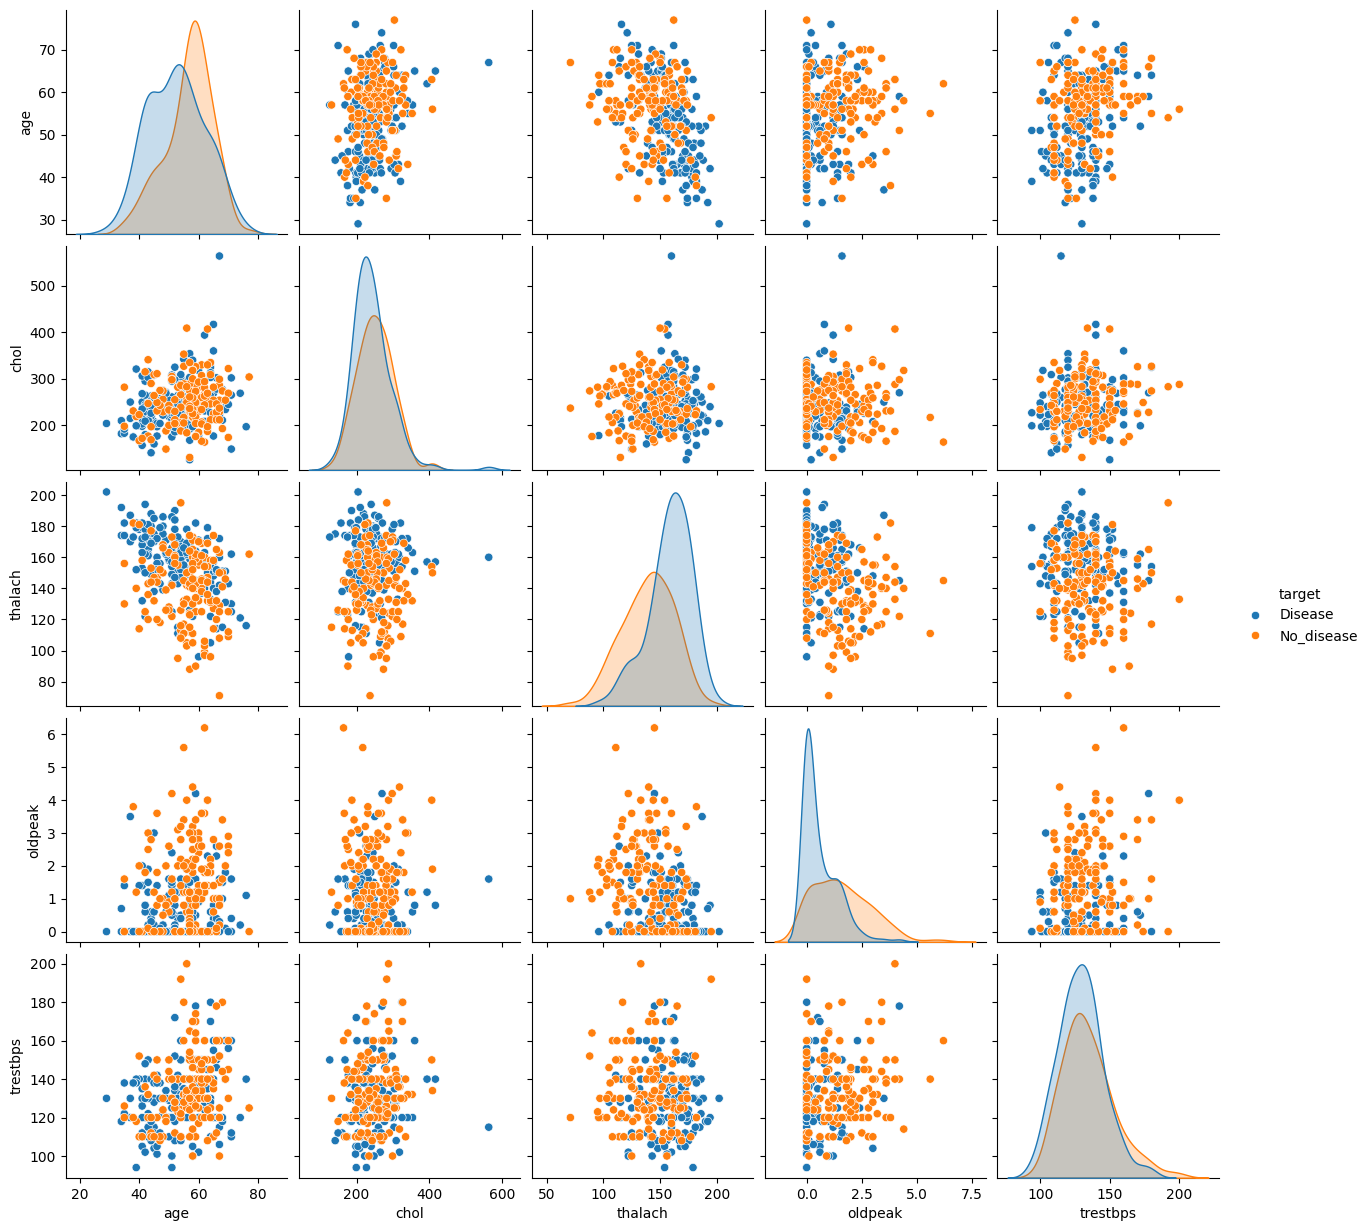

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

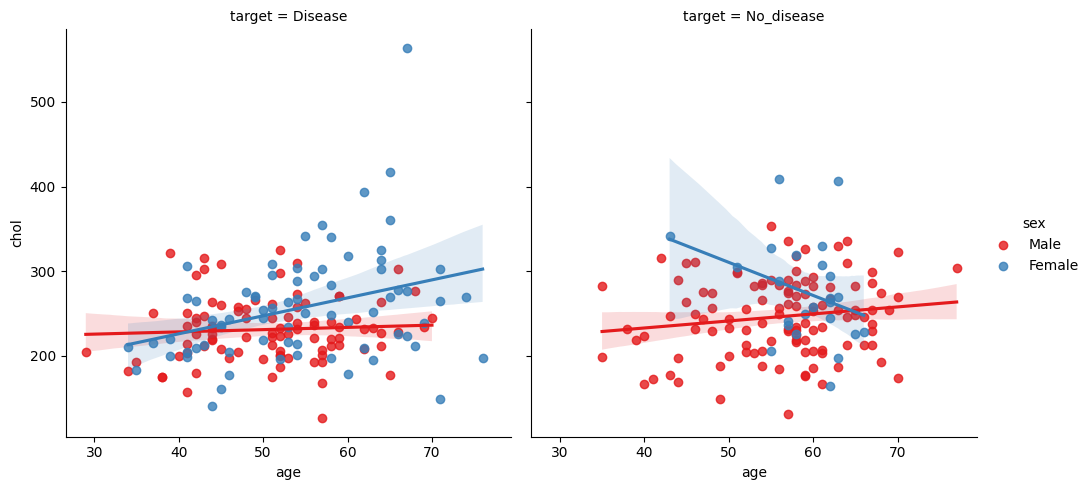

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

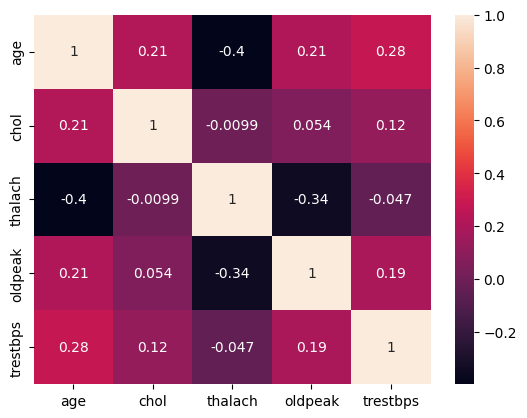

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

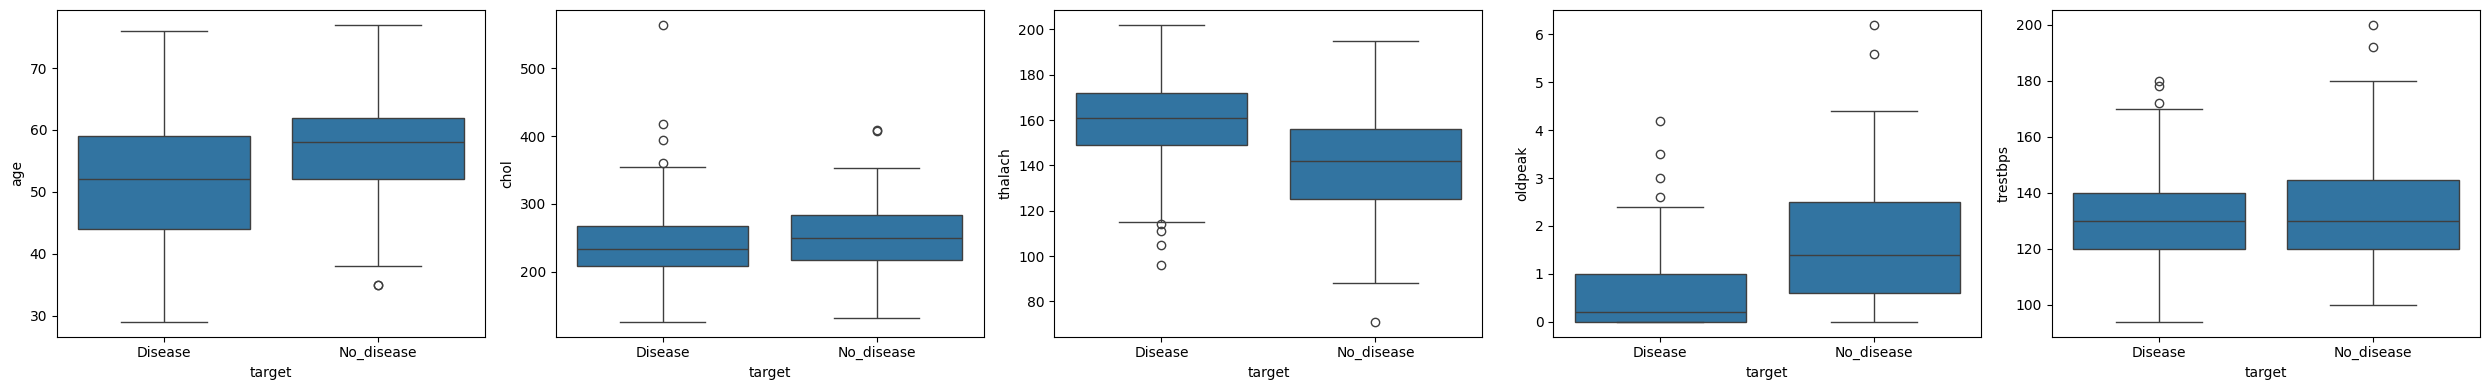

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

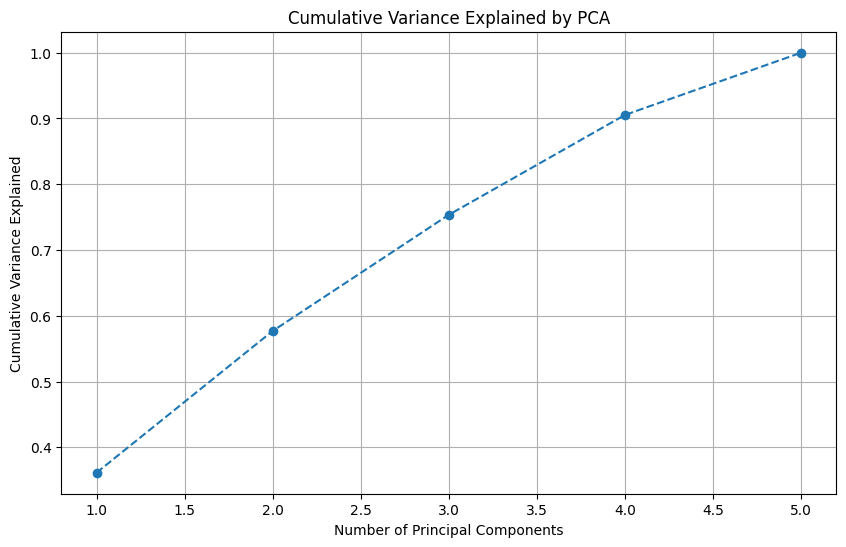

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select the continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = data[continuous_vars]

# Standardize the continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance explained by each principal component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


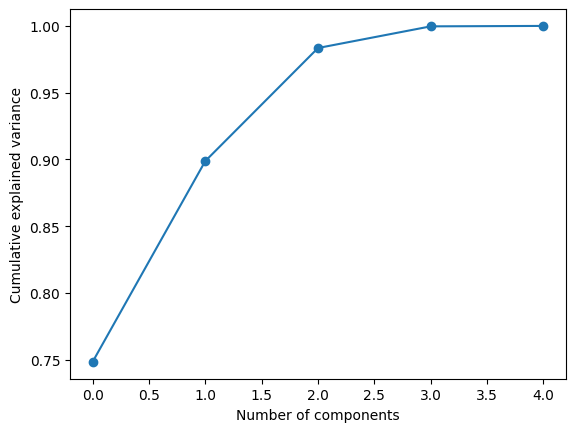

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


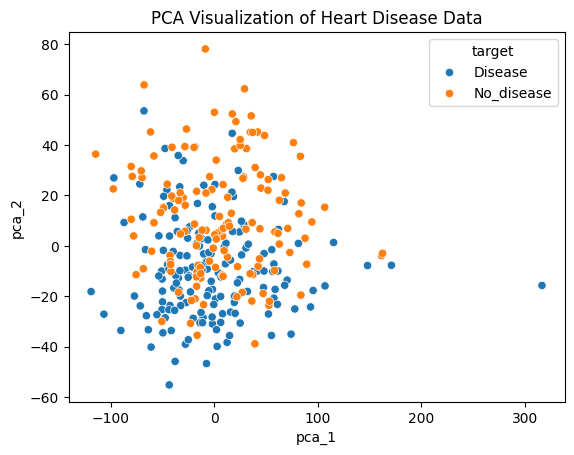

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


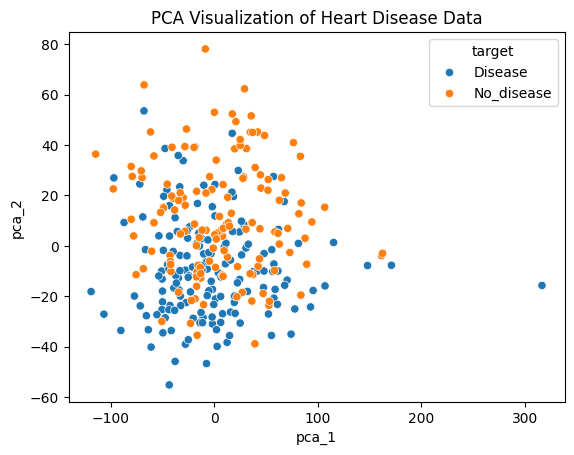

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


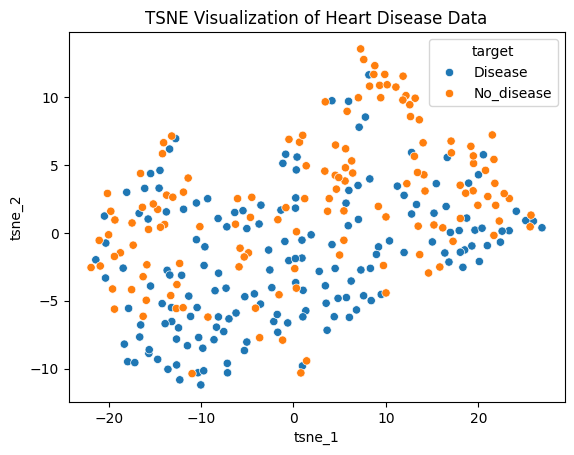

In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [ ]:
#1.What is the percentage of Samples with Disease?

# Calculate the percentage of samples with disease
data['target'] = data['target'].map({'Disease': 1, 'No_disease': 0})

# Calculate the percentage of samples with disease
percentage_disease = (data['target'].mean()) * 100
print(f"Percentage of Samples with Disease: {percentage_disease:.2f}%")


Percentage of Samples with Disease: 54.46%


In [ ]:
#2.what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

import pandas as pd
from scipy import stats

# Assuming 'data' is your DataFrame and 'target' is the column indicating disease presence (1) or absence (0)

# List of continuous features to test
continuous_features = ['age', 'chol', 'trestbps']  # Replace with your actual feature names

# Perform t-tests for each feature
for feature in continuous_features:
    group_disease = data[data['target'] == 1][feature]
    group_no_disease = data[data['target'] == 0][feature]
    t_statistic, p_value = stats.ttest_ind(group_disease, group_no_disease)
    print(f"Feature: {feature}, t-statistic: {t_statistic:.2f}, p-value: {p_value:.3f}")

# Alternatively, perform Mann-Whitney U tests (non-parametric)
for feature in continuous_features:
    group_disease = data[data['target'] == 1][feature]
    group_no_disease = data[data['target'] == 0][feature]
    u_statistic, p_value = stats.mannwhitneyu(group_disease, group_no_disease)
    print(f"Feature: {feature}, U-statistic: {u_statistic:.2f}, p-value: {p_value:.3f}")

Feature: age, t-statistic: -4.01, p-value: 0.000
Feature: chol, t-statistic: -1.48, p-value: 0.139
Feature: trestbps, t-statistic: -2.54, p-value: 0.012
Feature: age, U-statistic: 8240.50, p-value: 0.000
Feature: chol, U-statistic: 9789.50, p-value: 0.036
Feature: trestbps, U-statistic: 9784.50, p-value: 0.035


**3. Clear Separation in PCA and t-SNE Plots
From the plots, we can assess the separation between the presence and absence of disease.**

t-SNE Plot:
In the t-SNE plot, we see:

Blue points representing 'Disease' samples.
Orange points representing 'No_disease' samples.
Observations:

The points are somewhat scattered without forming very distinct clusters.
There is noticeable overlap between the blue and orange points, indicating that the features do not strongly distinguish between the classes.


PCA Plot:
For a PCA plot, if it were provided, we would expect:

Clear clusters of points if the features and their principal components provide good separation between the classes.
Overlapping points would suggest that the linear combinations of the original features (principal components) do not adequately separate the 'Disease' and 'No_disease' classes.

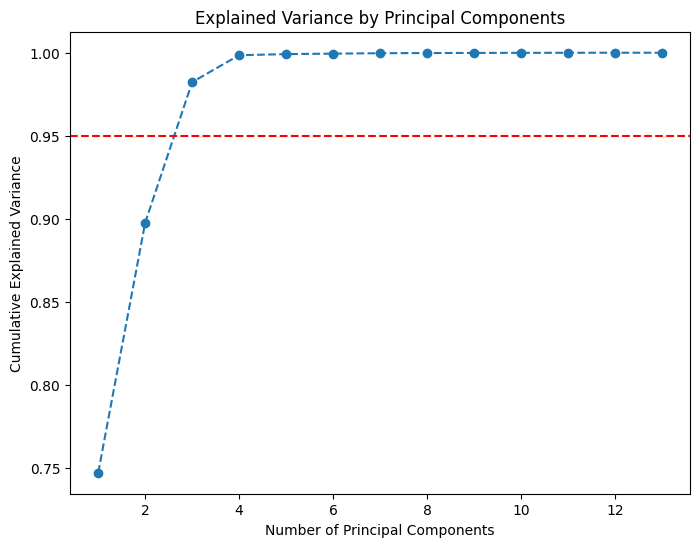

Optimal number of principal components: 3


In [ ]:
#4.optimal number of principal components
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical columns to strings before encoding
categorical_columns = ['sex', 'cp', 'exang', 'slope', 'thal']
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert column to string type

# Convert categorical columns to numerical values
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Convert target to numerical values manually
df['target'] = df['target'].map({'Disease': 1, 'No_disease': 0})

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df.drop('target', axis=1))

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Determine the optimal number of components
explained_variance = pca.explained_variance_ratio_.cumsum()
optimal_components = next(i for i, total_variance in enumerate(explained_variance) if total_variance >= 0.95) + 1
print(f"Optimal number of principal components: {optimal_components}")


****

**5.what are the continous features with the highest correation with each other?**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your dictionary, convert it to a DataFrame
df = pd.DataFrame(data)

# Identify categorical columns and convert them to numerical using Label Encoding
categorical_cols = ['sex', 'cp', 'exang', 'slope', 'thal']  # Replace with actual categorical column names
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Try converting all columns to numeric (handle errors)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Conversion issue with column: {col}")


# --- Correlation Calculation (after checks) ---
correlation_matrix = df.corr()

# Get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Use 'np' here


# Find the pair with the highest correlation
most_correlated_pairs = upper_triangle.unstack().sort_values(ascending=False).dropna()
highest_correlations = most_correlated_pairs.head(3)

highest_correlations

slope  cp          1.000000
exang  chol        0.956923
fbs    trestbps    0.872872
dtype: float64

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [13]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [14]:
data = pd.read_csv("star_nutri_expanded.csv")

In [15]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [16]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [17]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [18]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [20]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [21]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [22]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [23]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [24]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [25]:

data = data.replace({True: 1, False: 0})


In [26]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [27]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

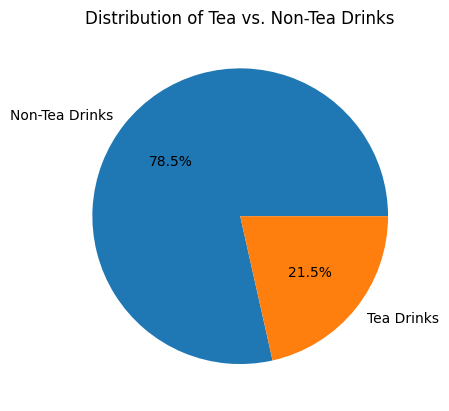

In [31]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
plt.pie(data['Tea'].value_counts(), labels=['Non-Tea Drinks', 'Tea Drinks'], autopct='%1.1f%%')
plt.title('Distribution of Tea vs. Non-Tea Drinks')
plt.show()



# Observations:
Non-Tea Dominance: The majority of the beverages in the dataset are non-tea drinks, accounting for approximately 78.5% of the total.

Tea Drinks: Tea drinks make up around 21.5% of the beverages, indicating a significant but smaller presence compared to non-tea drinks.

Proportion: The dataset reflects a substantial emphasis on non-tea beverages, with tea drinks forming a noteworthy minority.

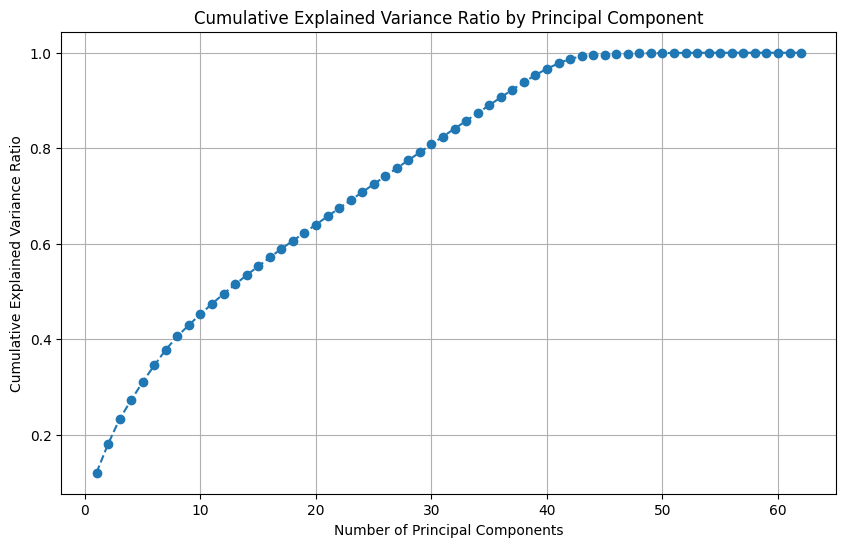

Optimal number of principal components: 39


In [35]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Plot the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Find the optimal number of components where the cumulative explained variance is above a threshold (e.g., 95%)
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Optimal number of principal components: {optimal_components}')

The optimal no.of components will be 39 or 40.

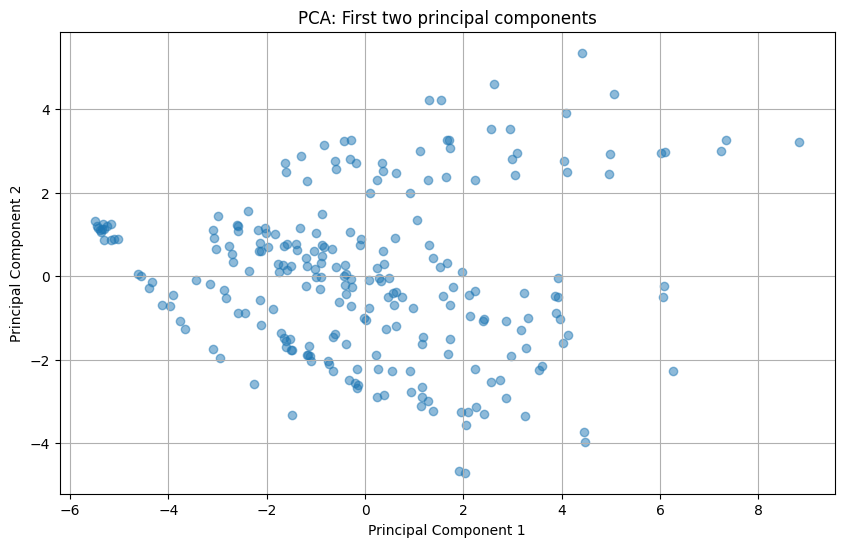

Cumulative explained variance with 40 components: 0.97


In [36]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA with the optimal number of components
optimal_components = 40  # Replace this number based on your plot
pca = PCA(n_components=optimal_components)
pca_result = pca.fit_transform(data_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Print cumulative explained variance for confirmation
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance with {optimal_components} components: {cumulative_explained_variance[-1]:.2f}')

# Observations:
From the above plot we could see by using 2 components, the data doesn't contain any relation or patterns, most of the data points are at random.There are some data points very close to each other forming clusters.

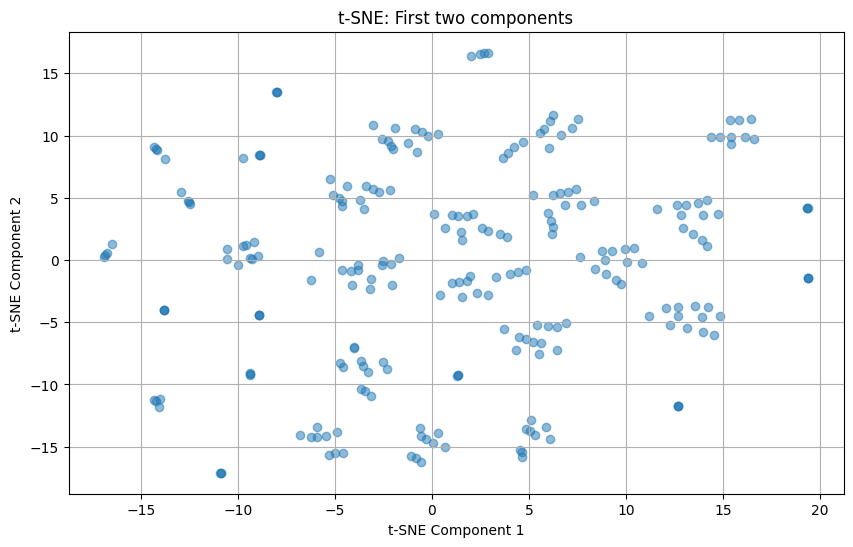

In [38]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Plot the first two t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE: First two components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

**Observations from the t-SNE Plot:**

Clusters: t-SNE is designed to reveal clusters and local structures in high-dimensional data. Look for distinct clusters of points in the plot, which may indicate natural groupings within the data.

Separation of Points: The separation between points or clusters can indicate differences or similarities between data points.

Patterns and Outliers: Any patterns or outliers visible in the plot can provide insights into the data's structure and highlight potential areas for further investigation.
By examining the t-SNE plot, you can gain a deeper understanding of the relationships and structures within your dataset.

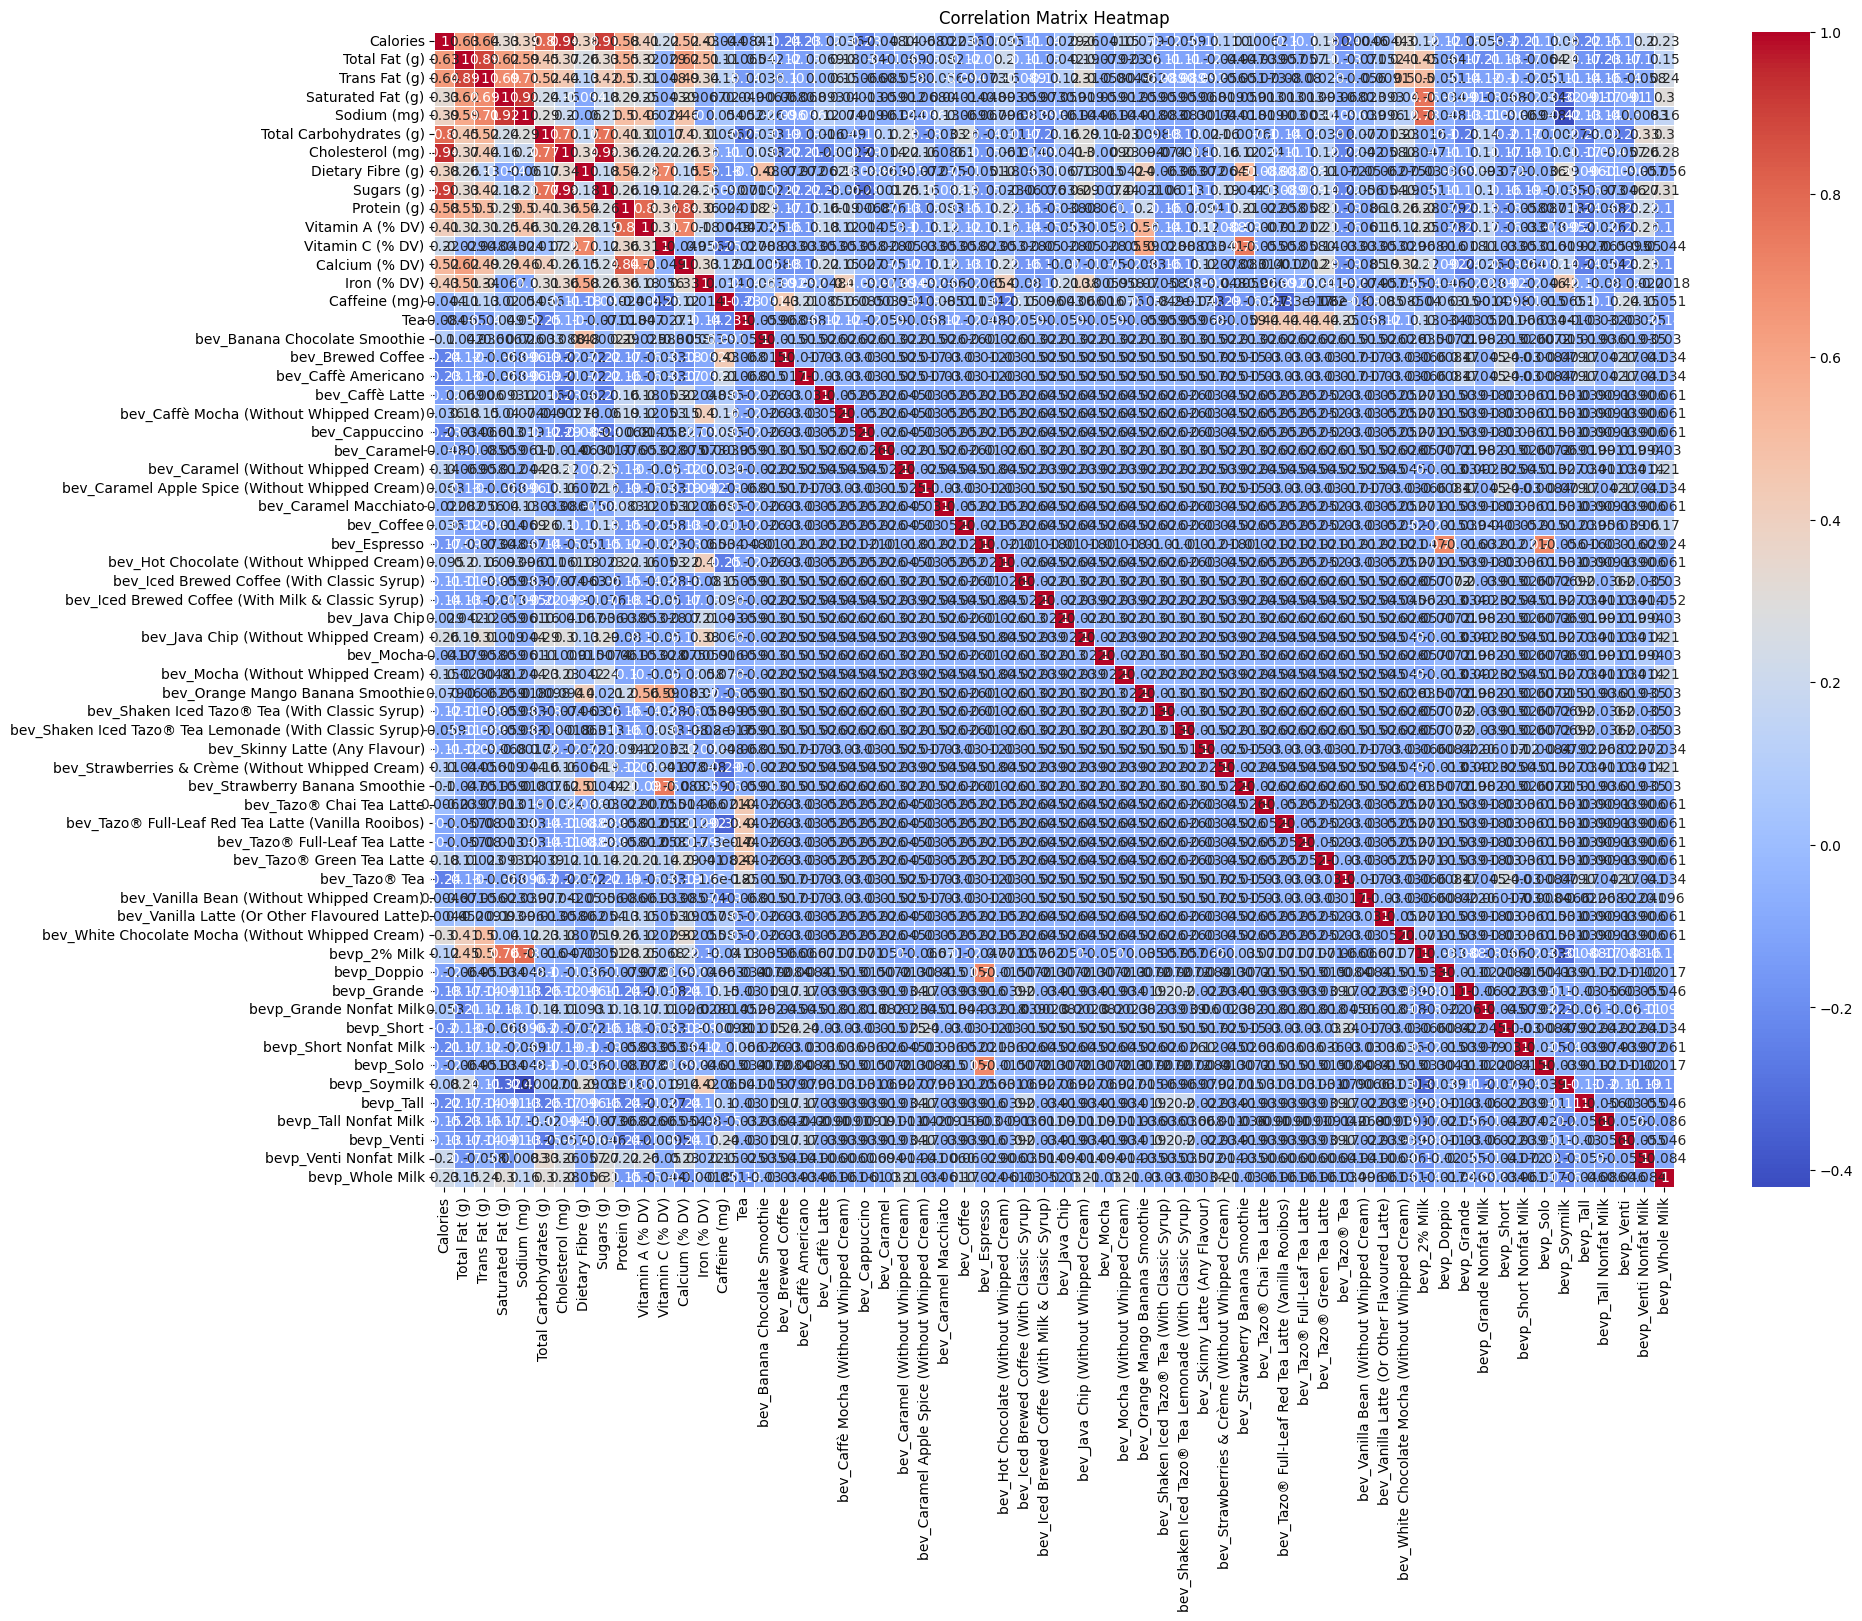

In [39]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Observations from the Heatmap:

Strong Correlations: Look for cells with high correlation coefficients (close to 1 or -1). These indicate strong relationships between the corresponding features.

Negative Correlations: Cells with negative correlation coefficients indicate inverse relationships between features.

Clusters of Features: Groups of features with high correlations among themselves can indicate that these features capture similar information.

Independent Features: Features with low or no correlation with others can be considered more independent in their contribution to the dataset.

Redundancy: Very high correlations (close to 1) between features might suggest redundancy, indicating that one of the features could potentially be dropped without losing much information.

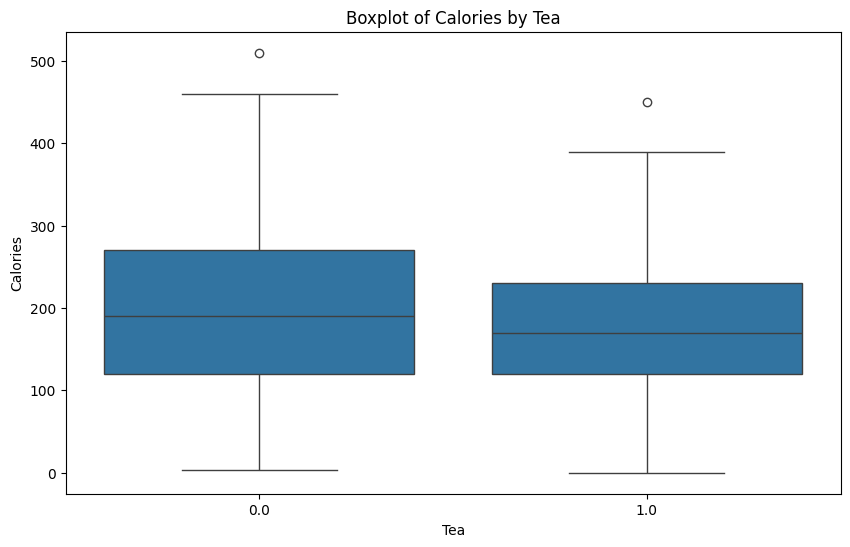

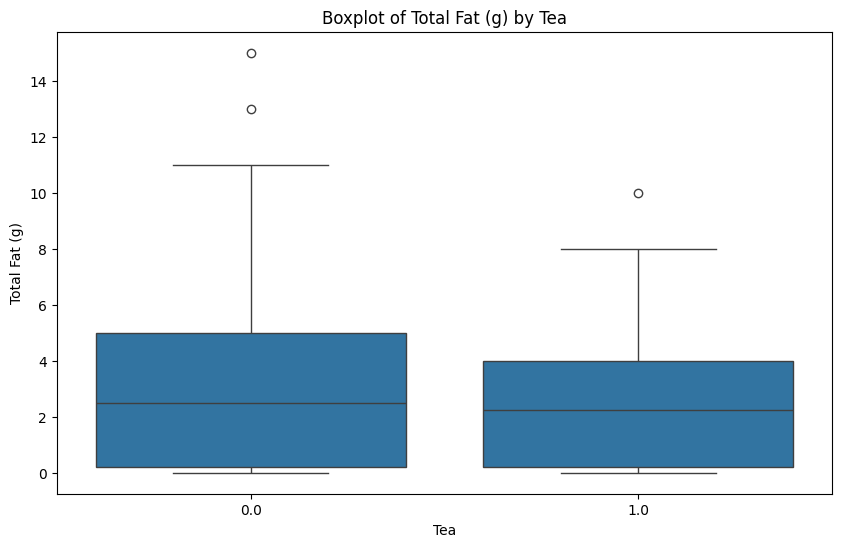

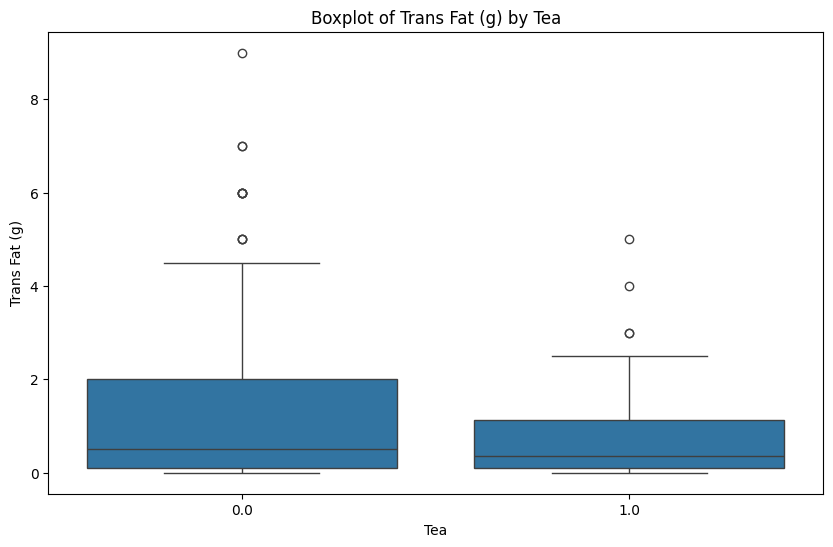

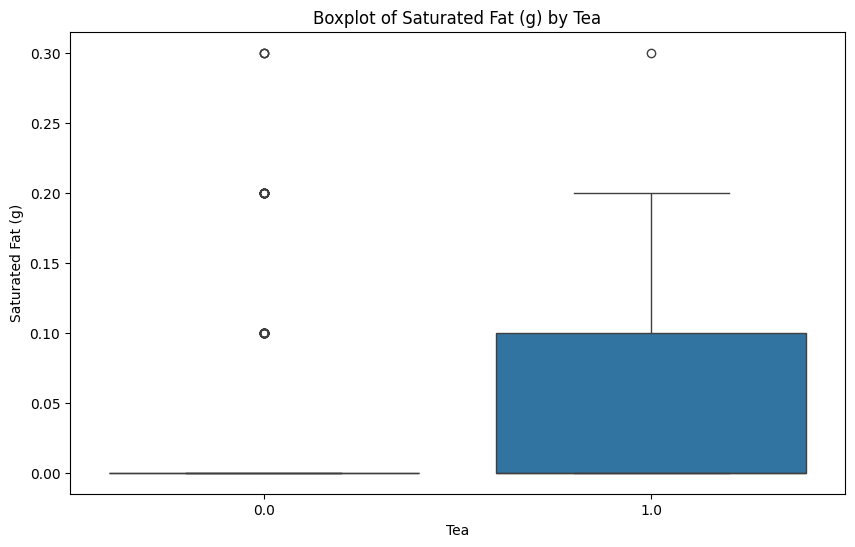

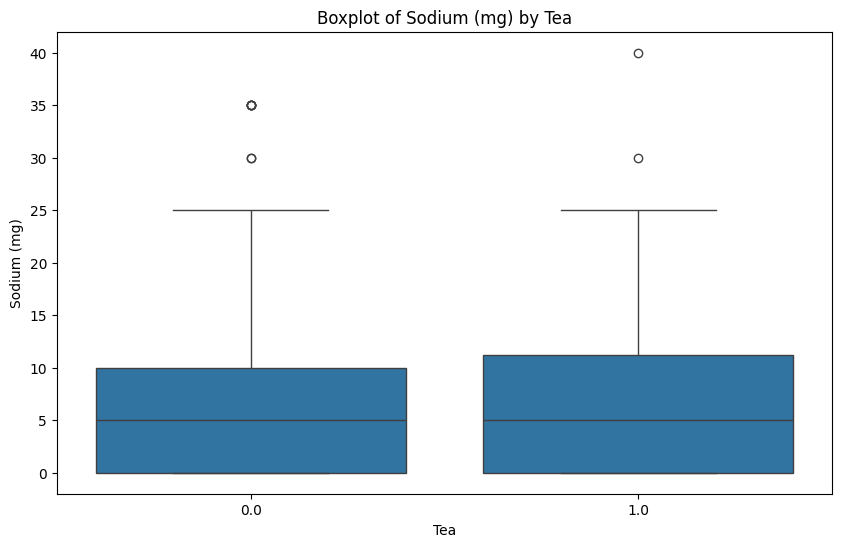

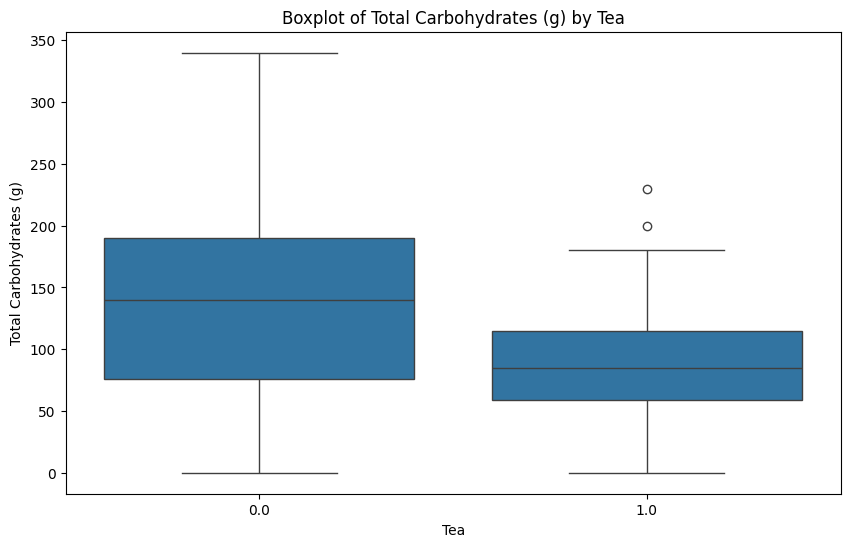

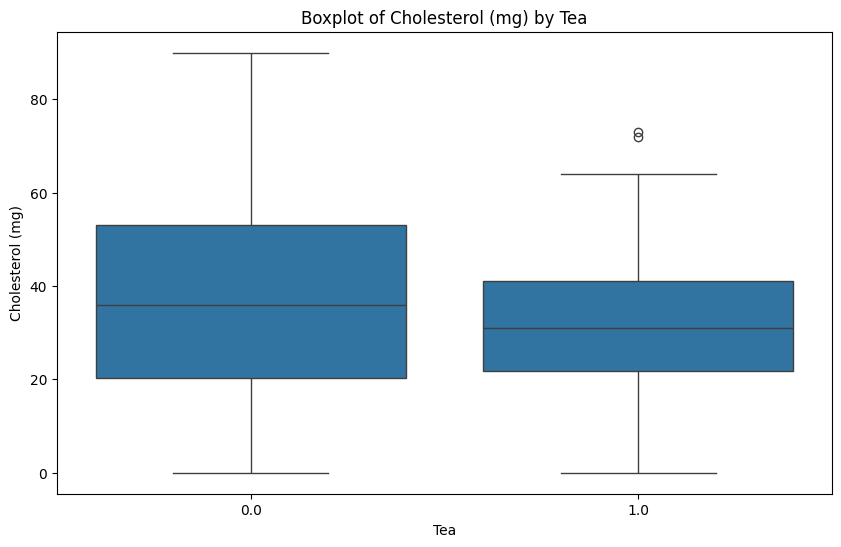

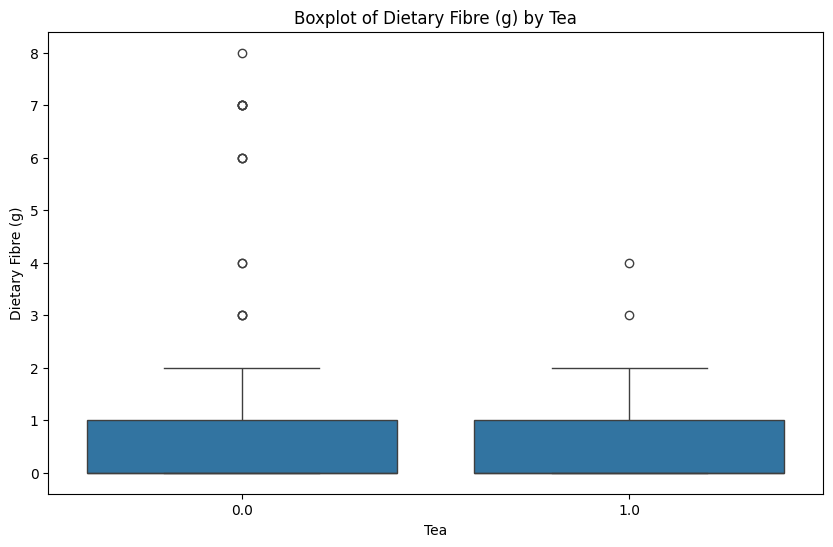

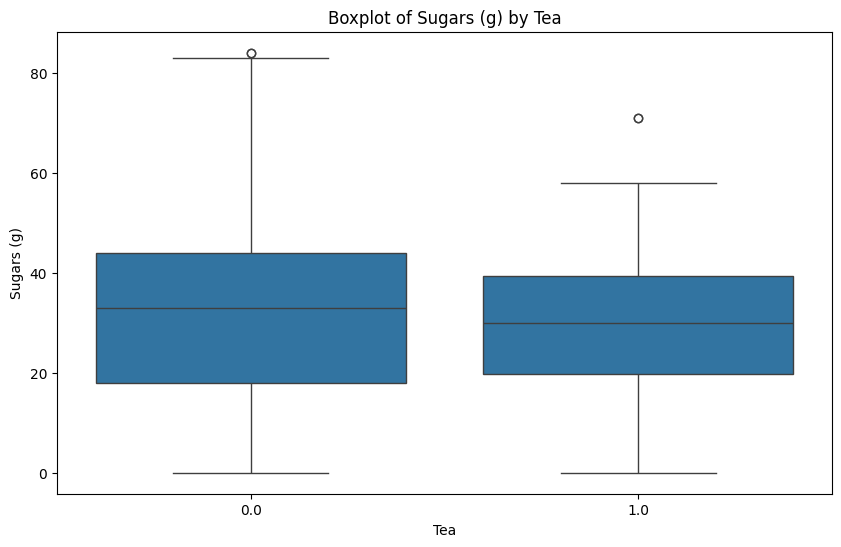

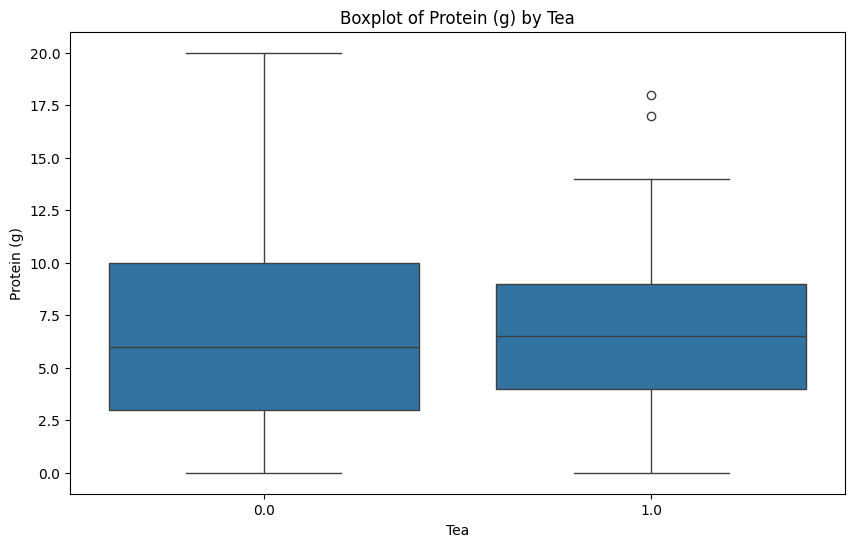

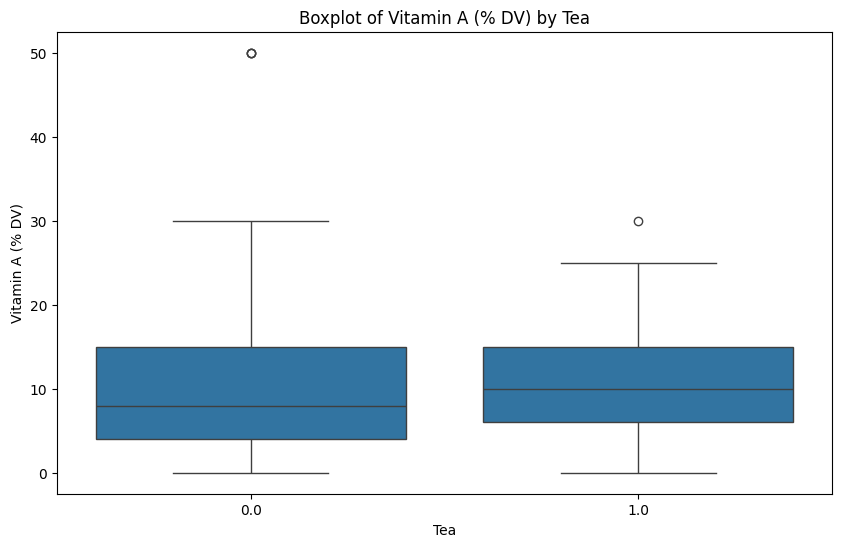

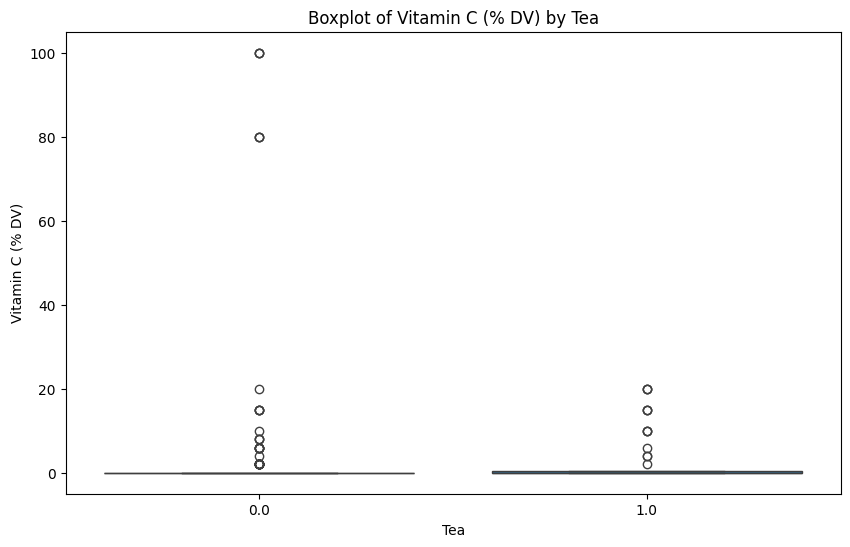

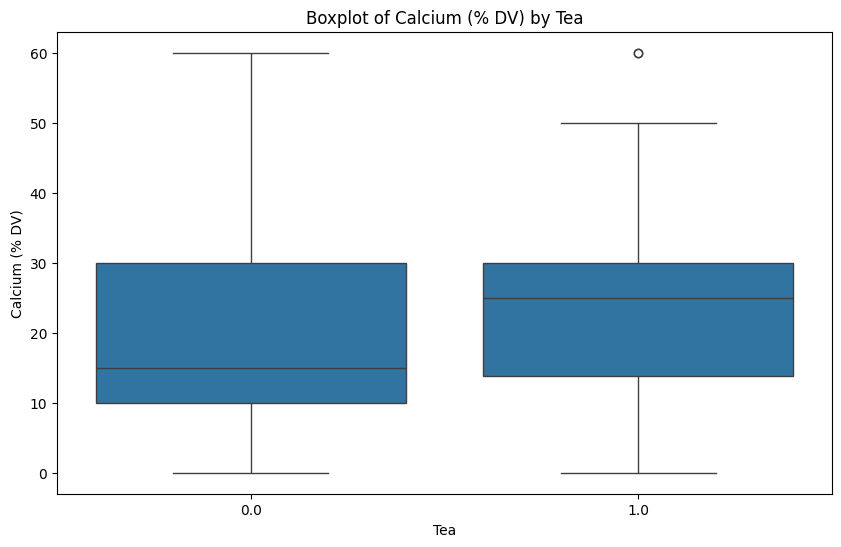

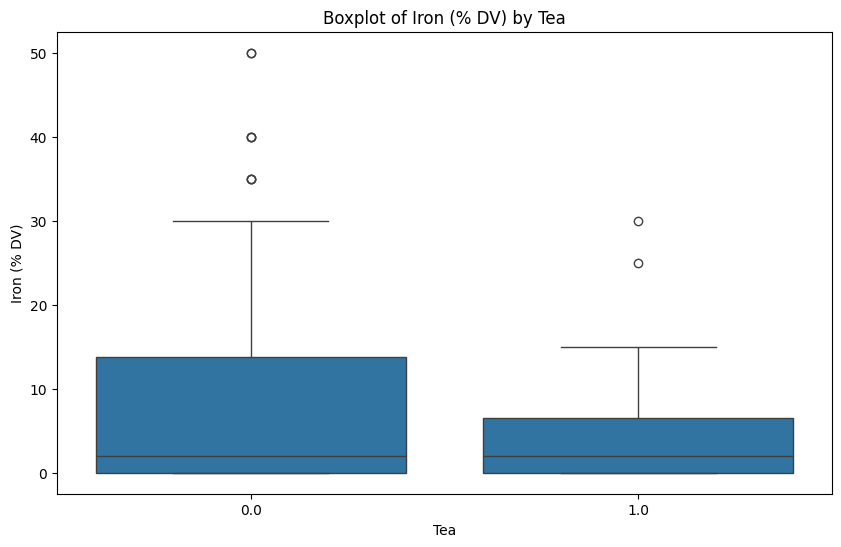

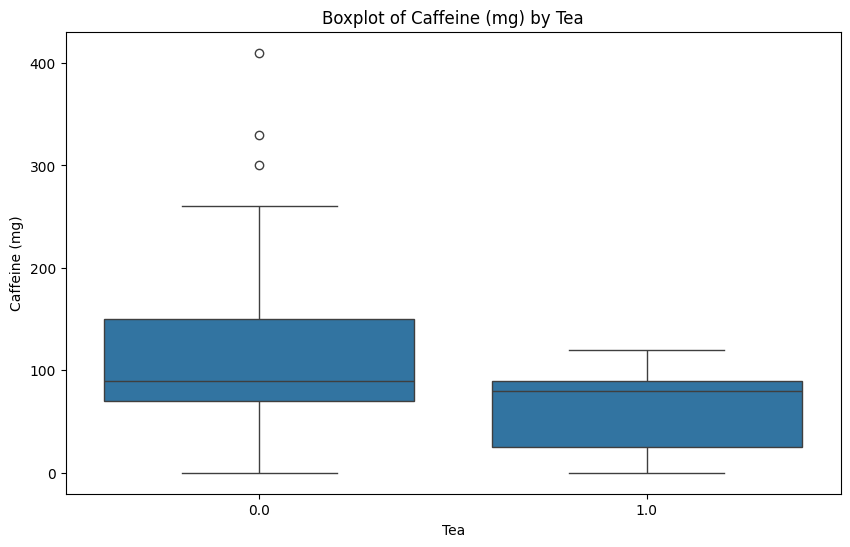

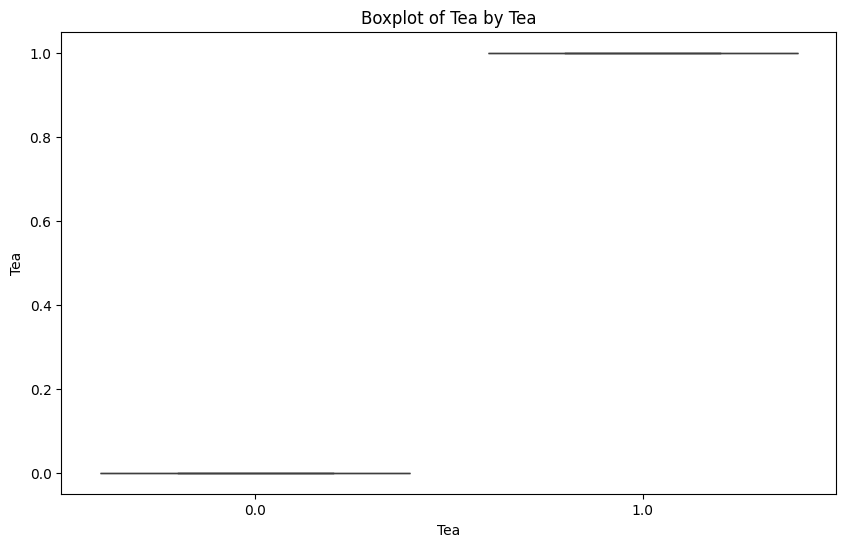

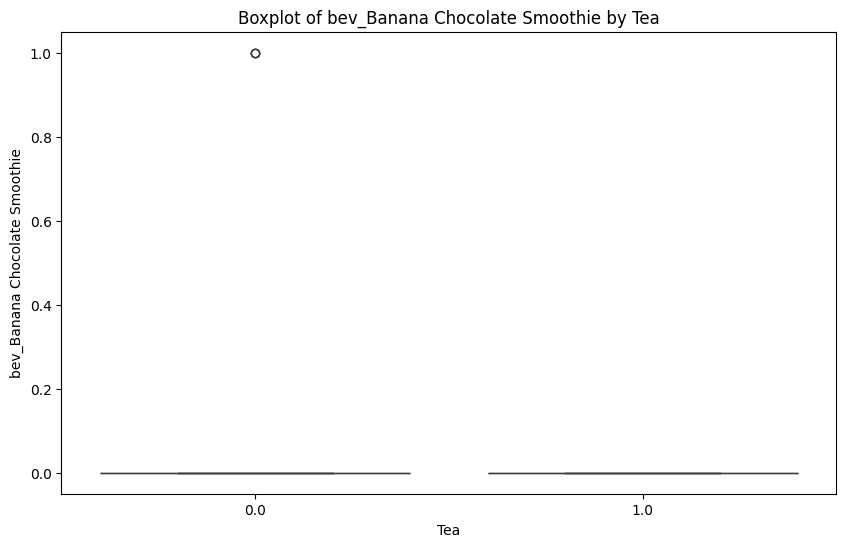

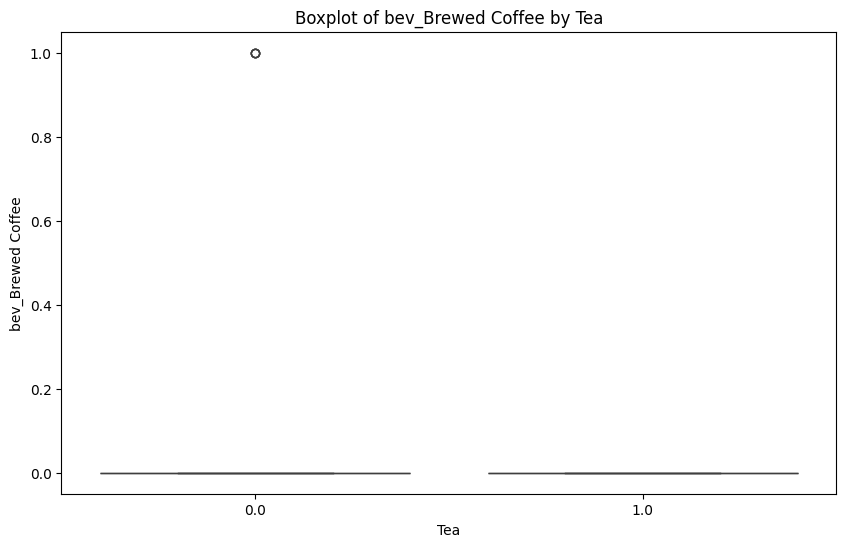

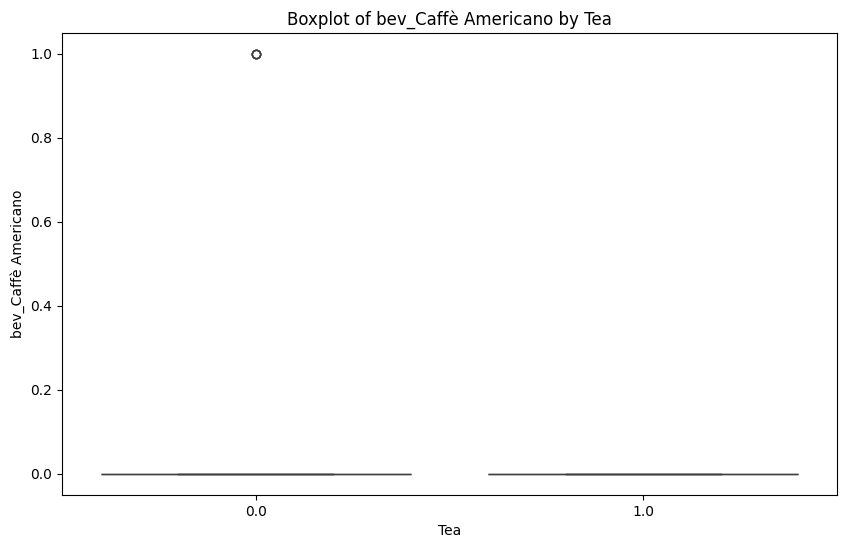

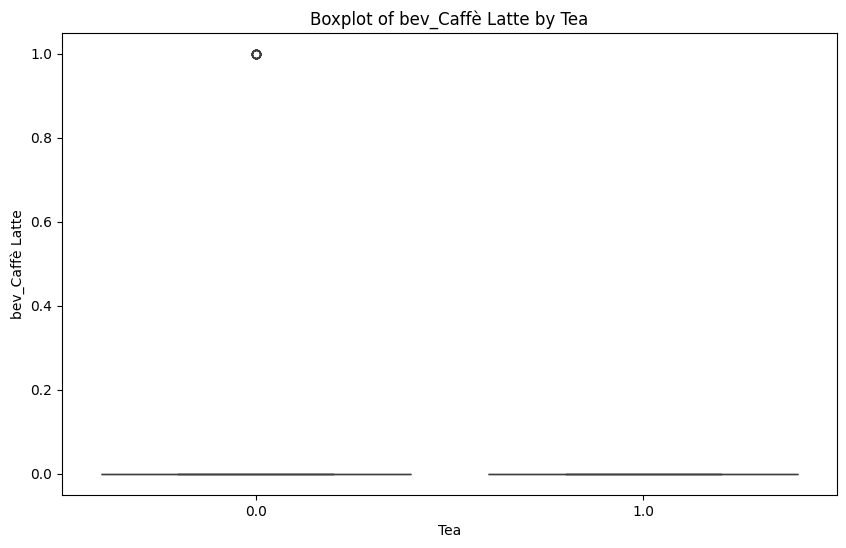

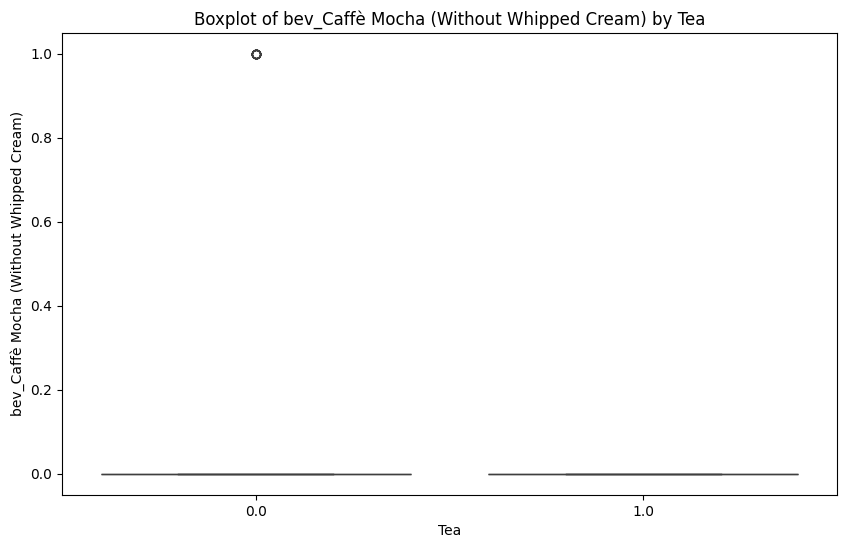

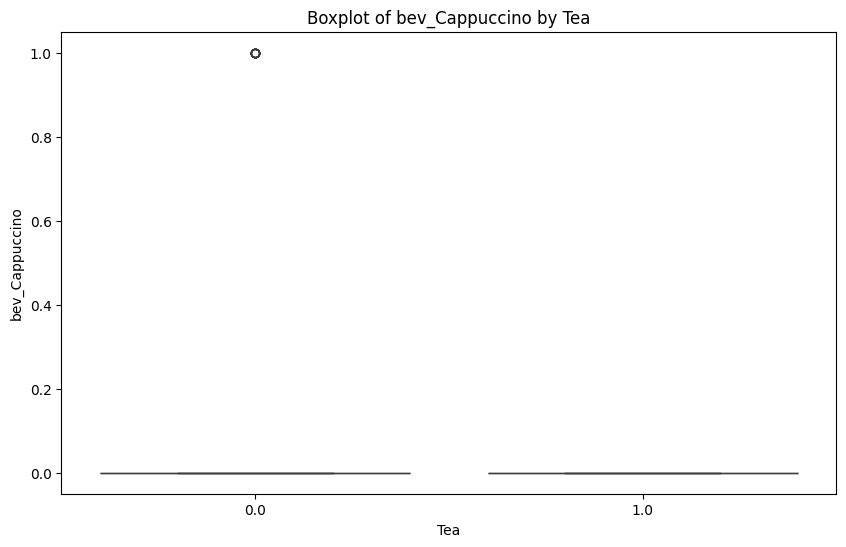

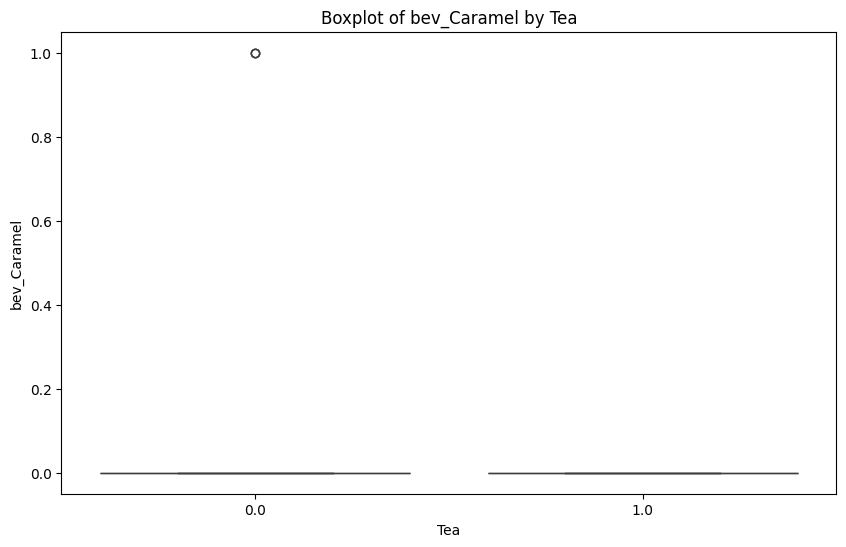

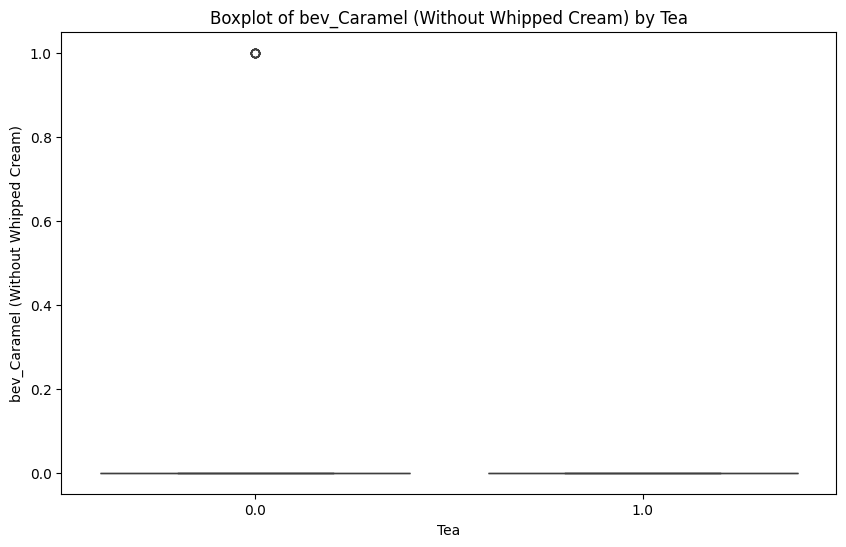

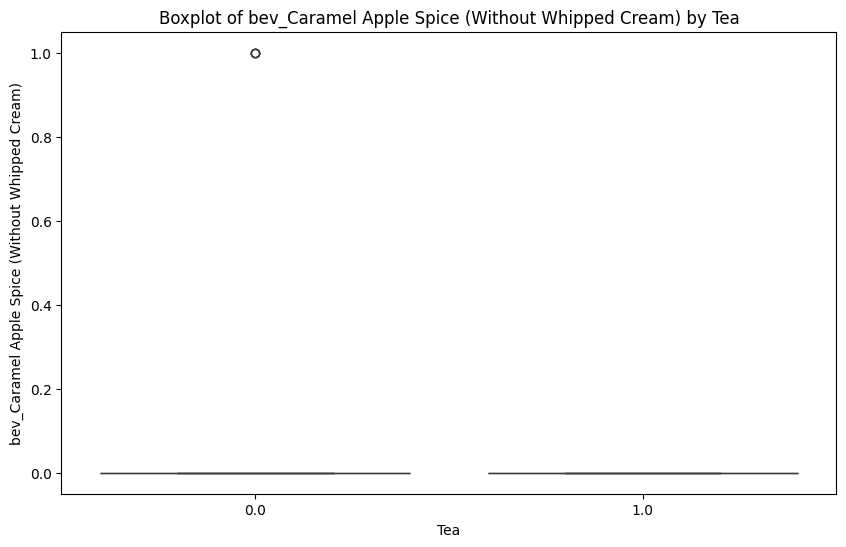

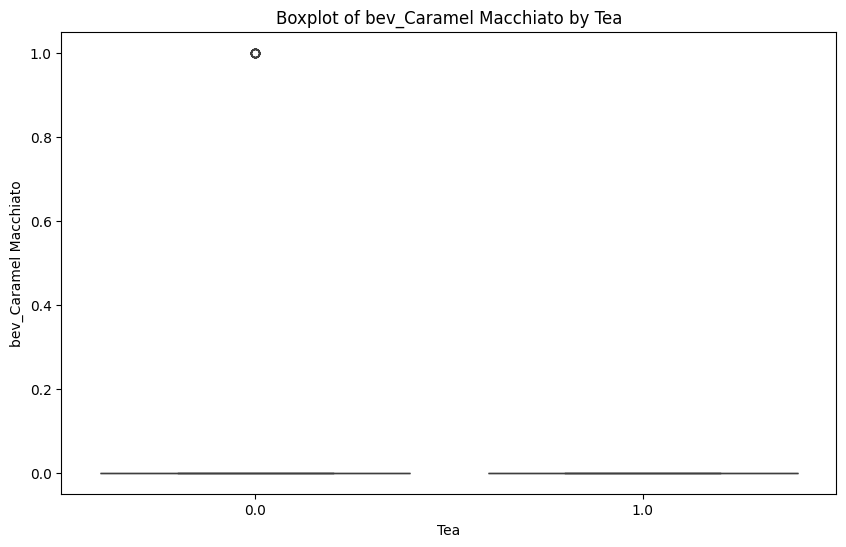

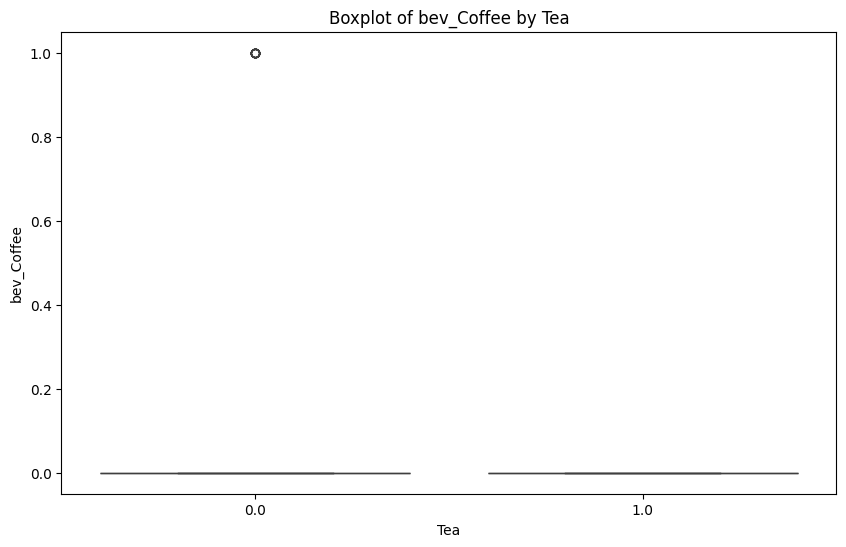

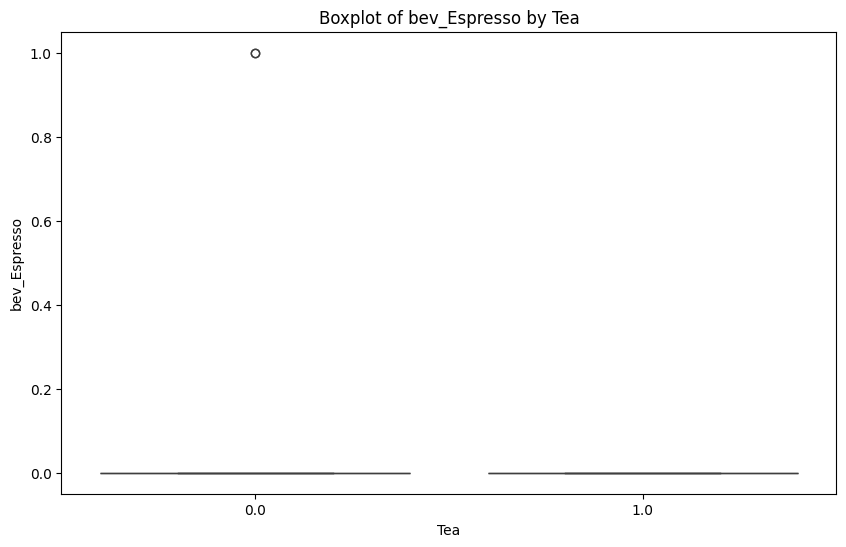

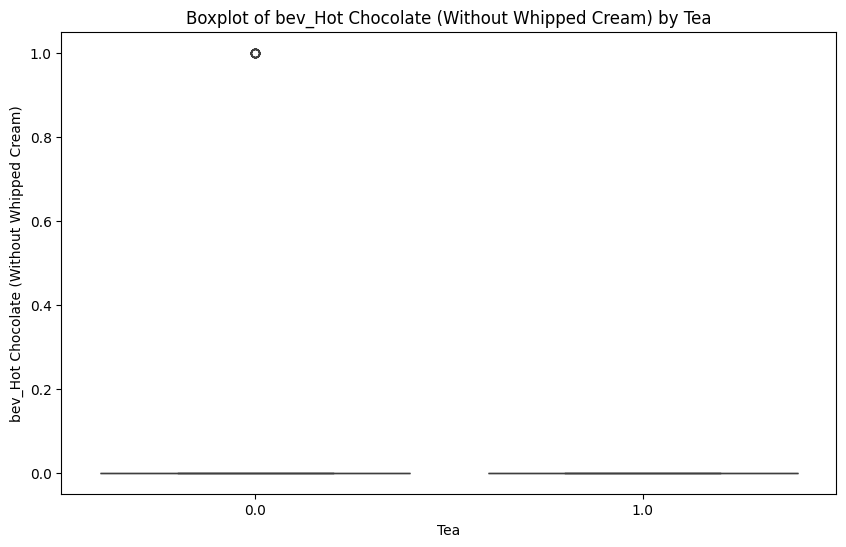

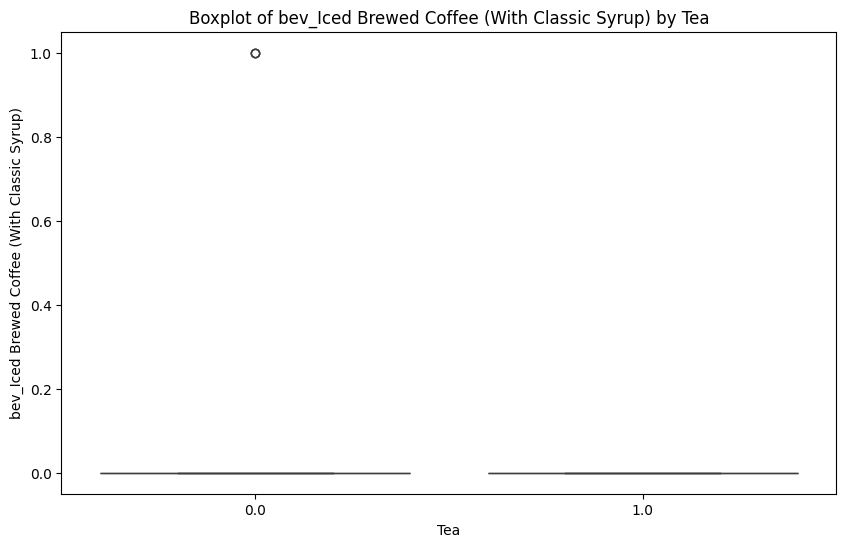

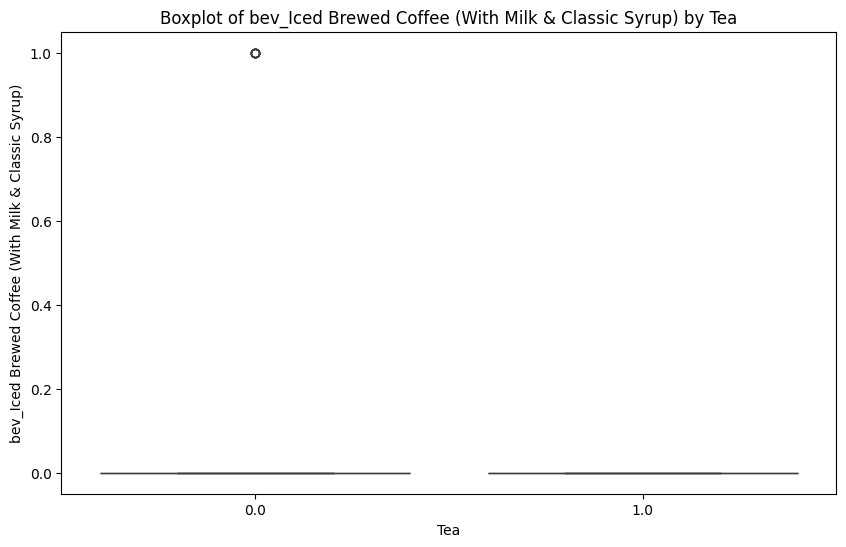

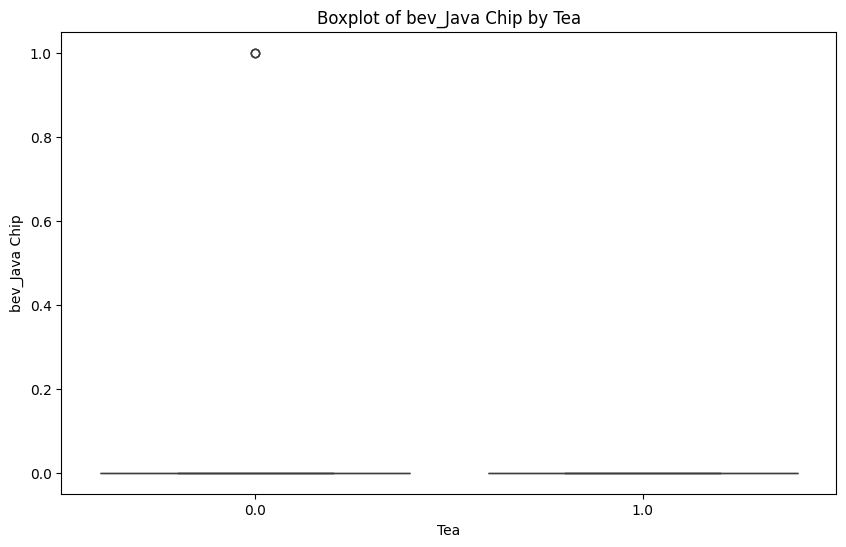

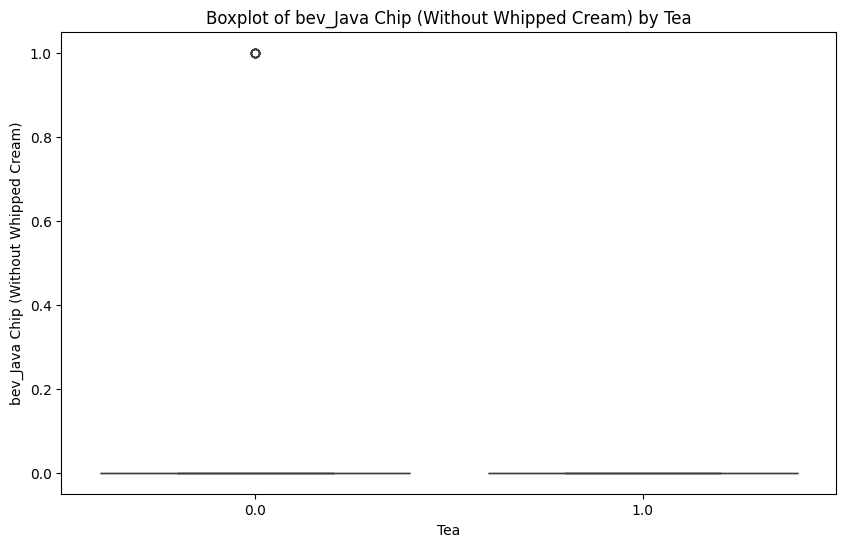

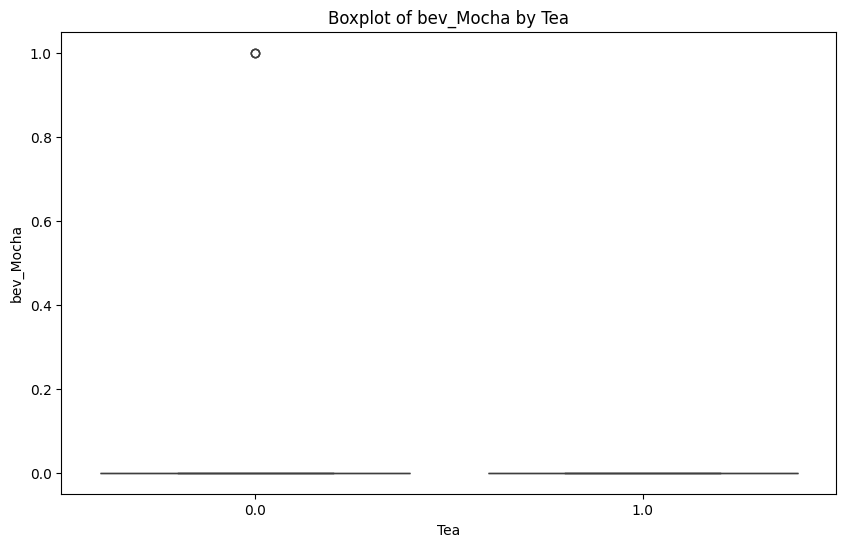

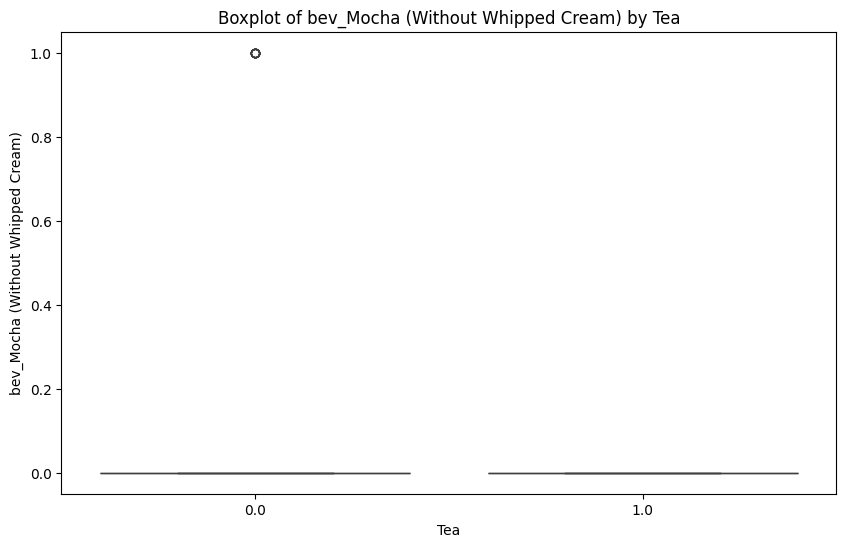

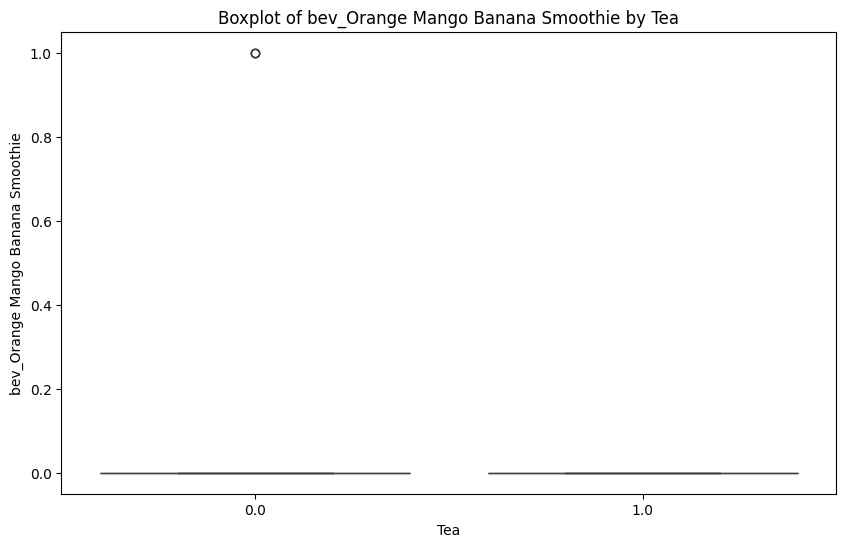

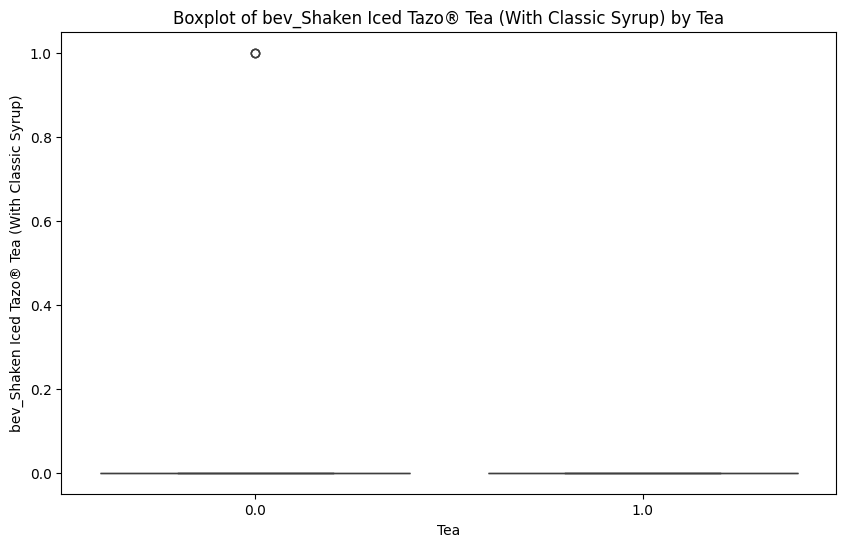

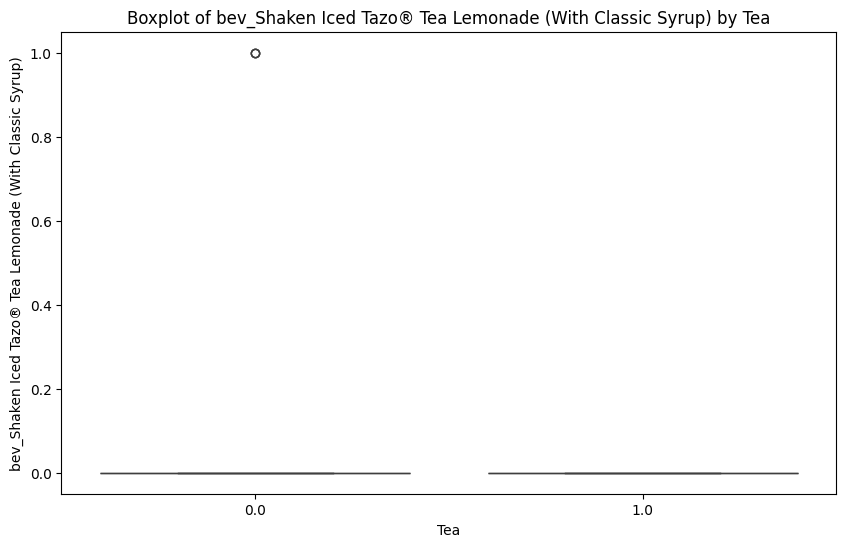

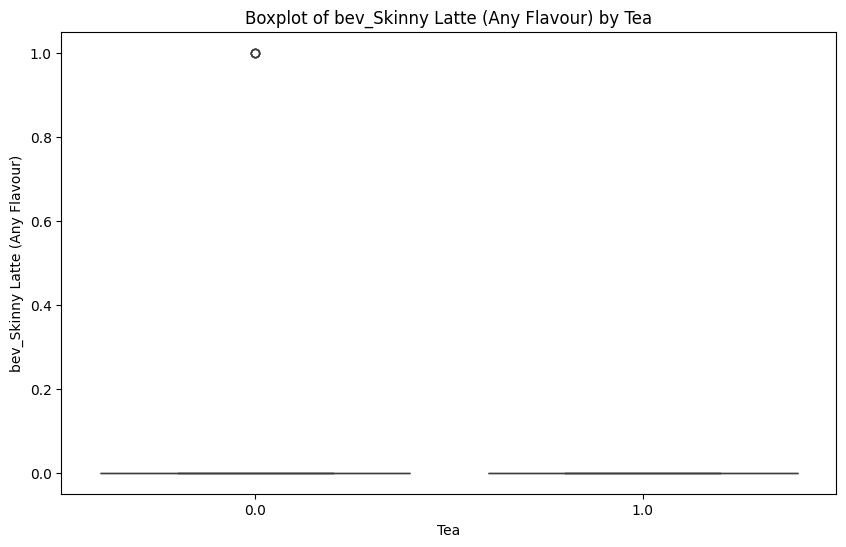

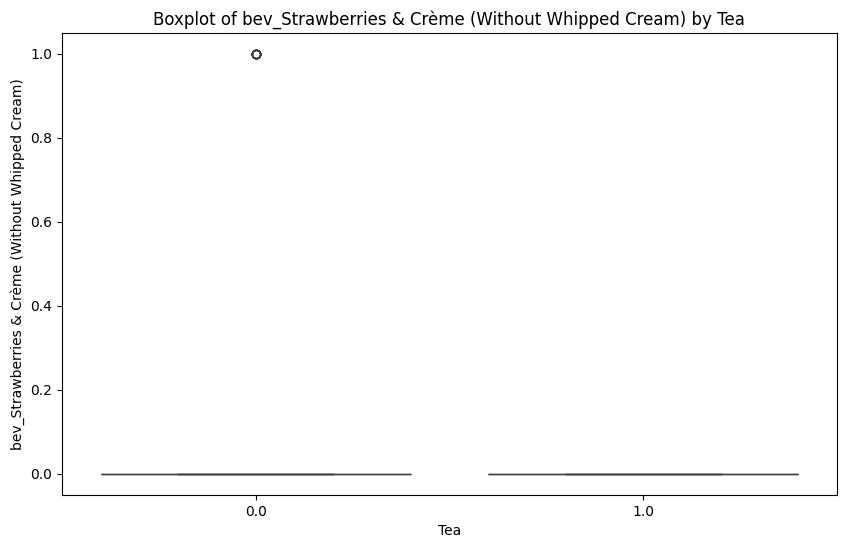

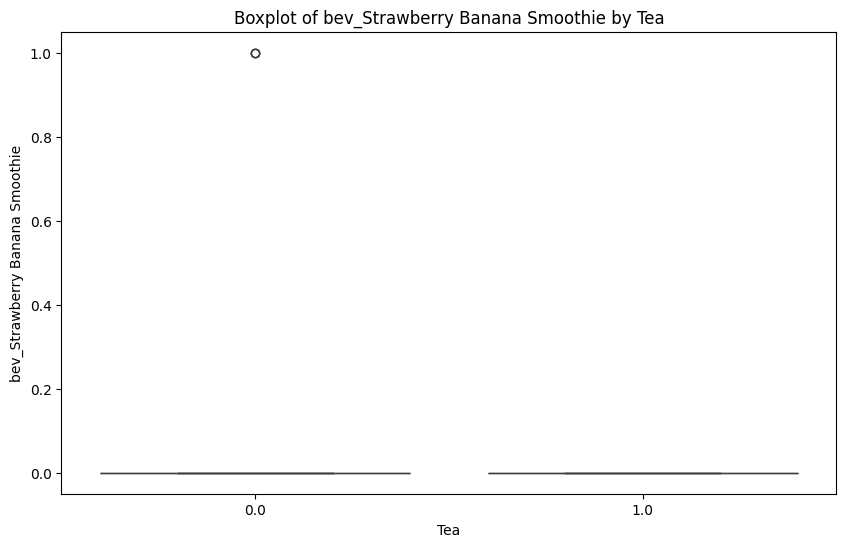

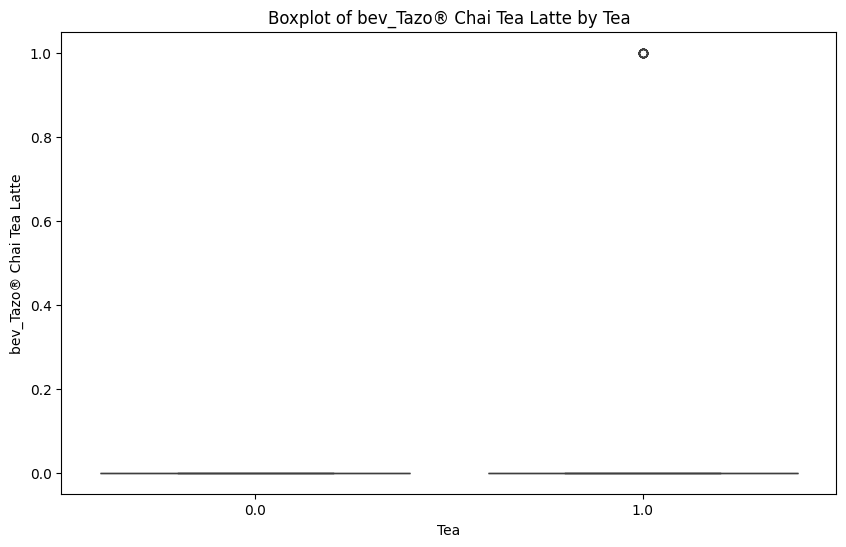

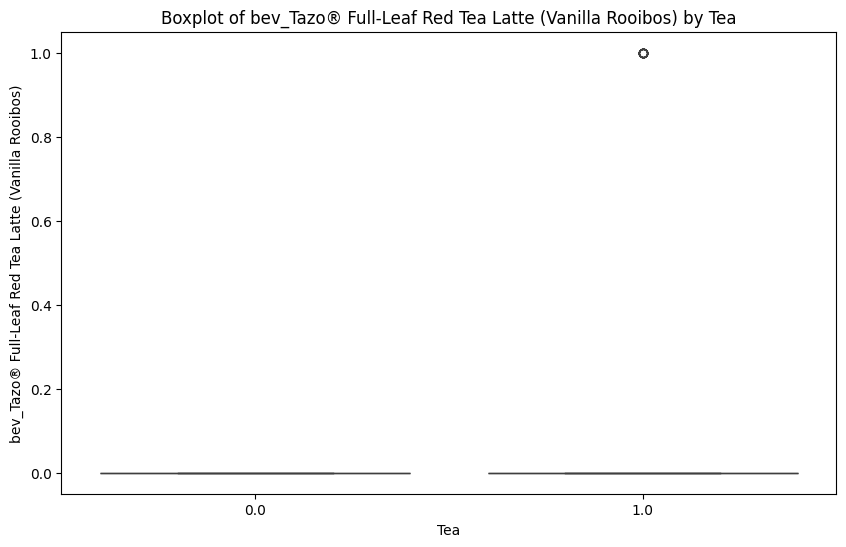

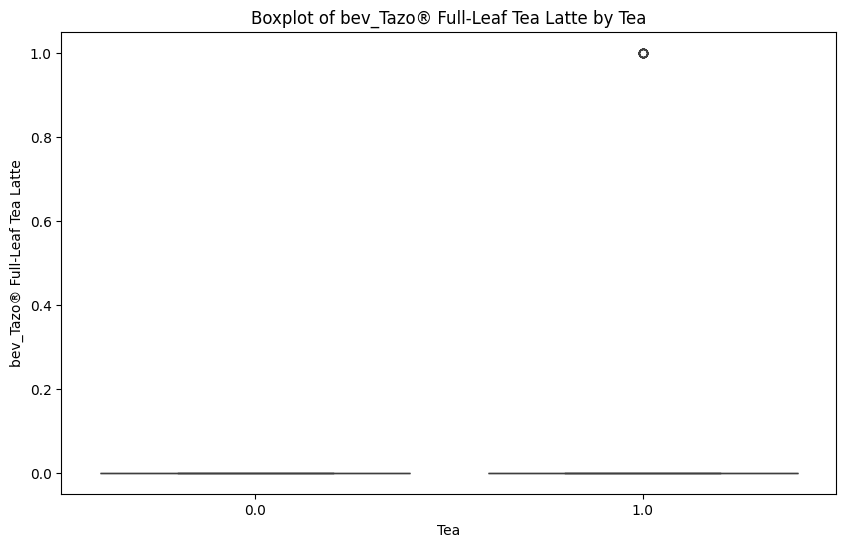

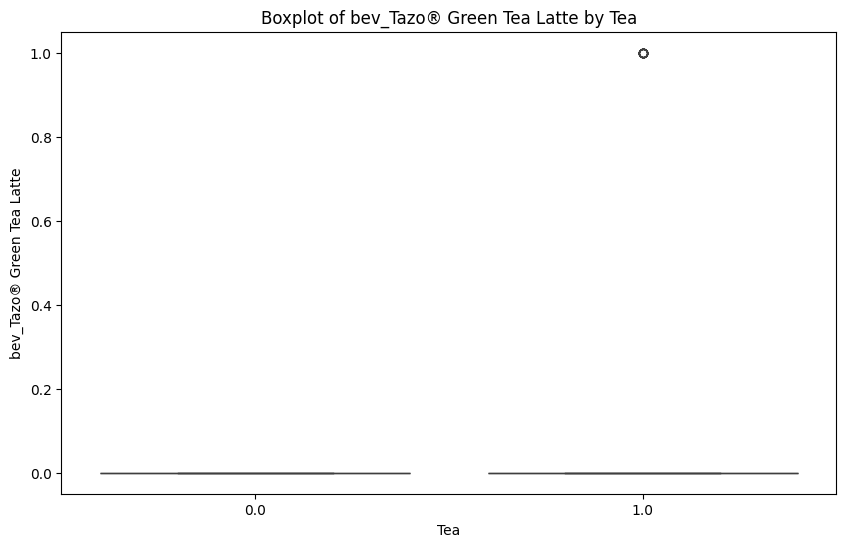

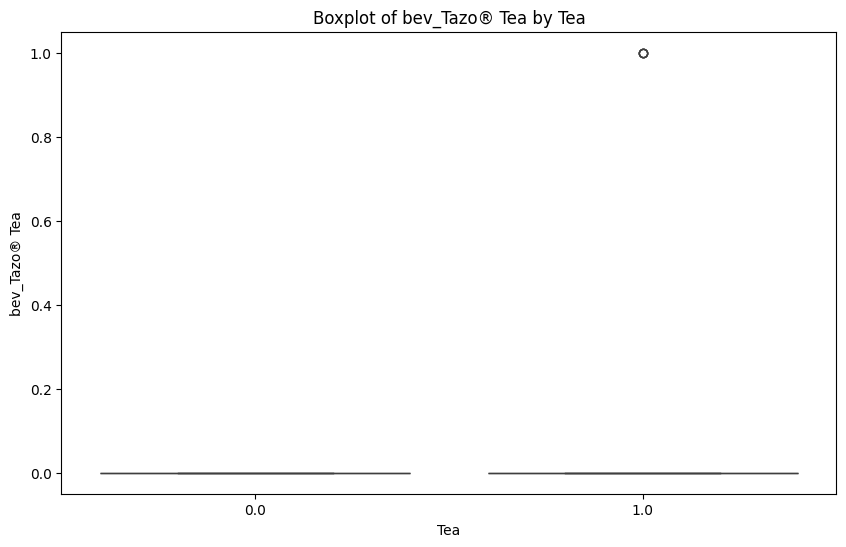

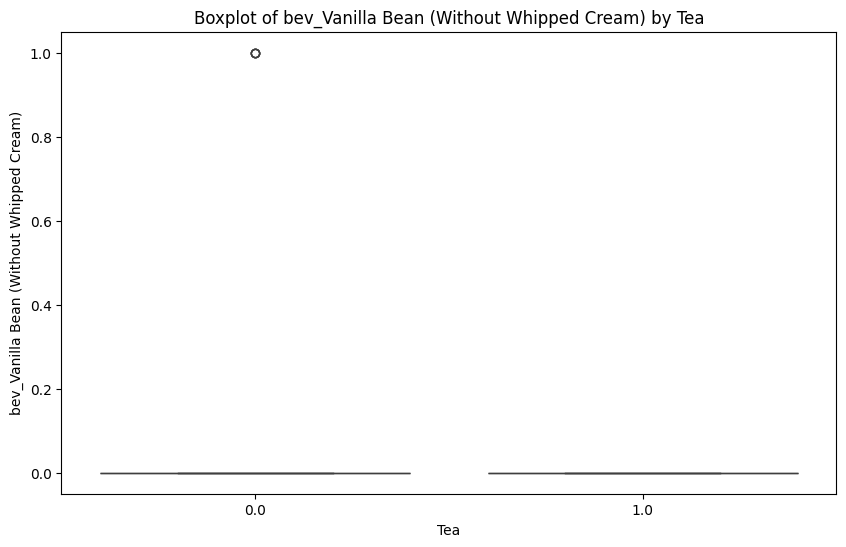

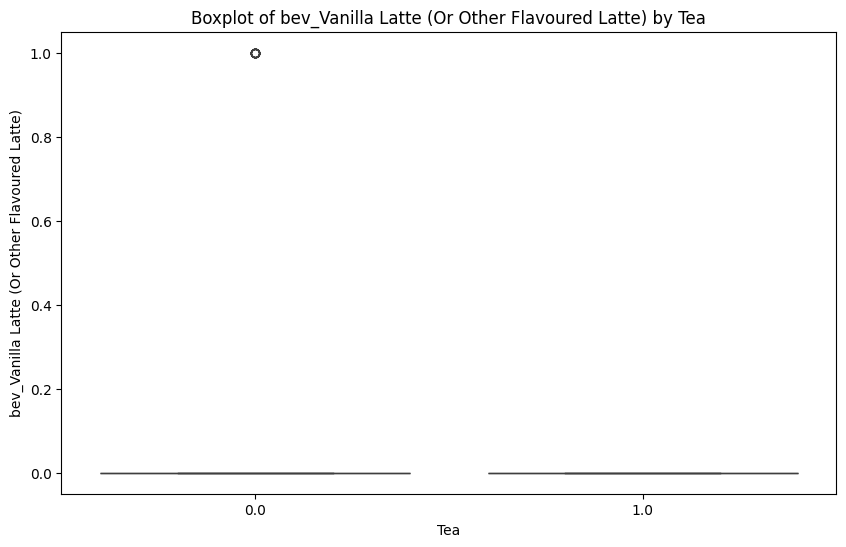

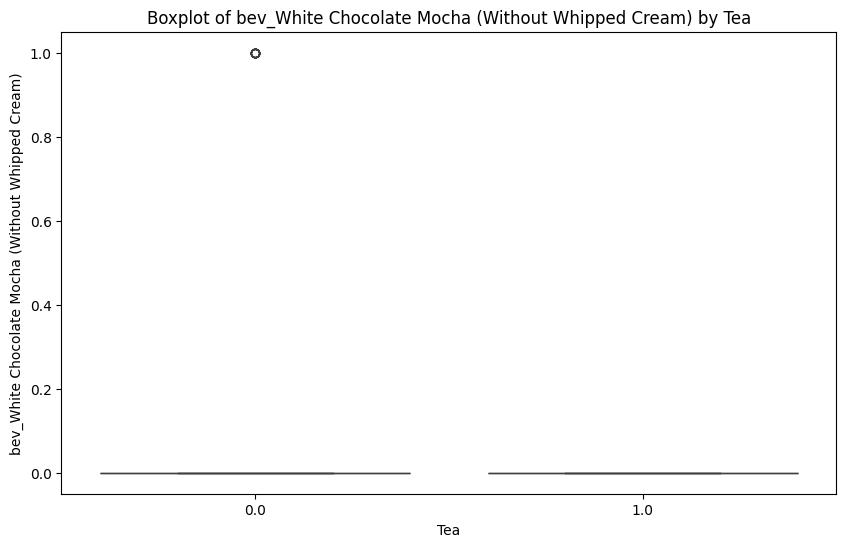

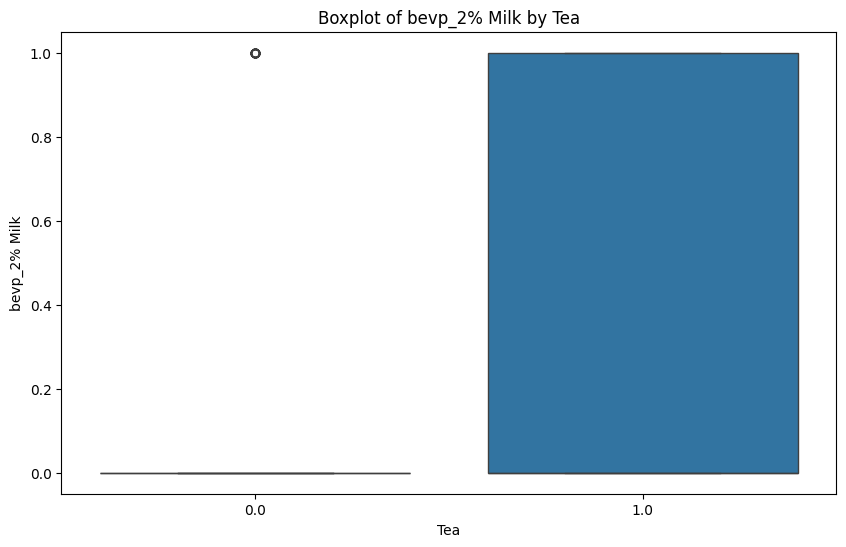

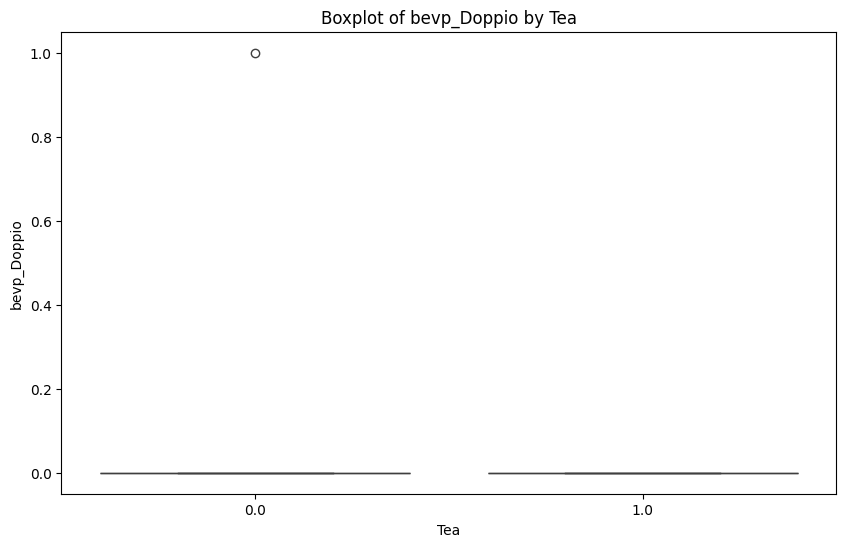

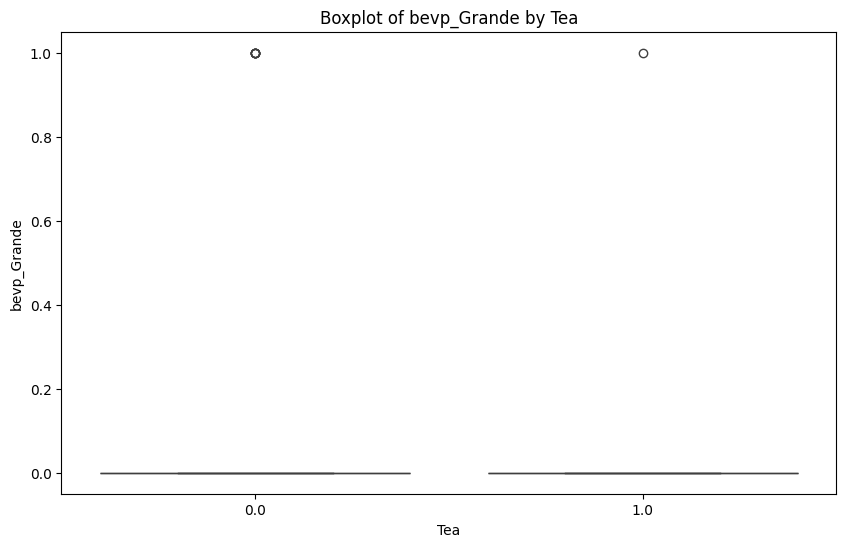

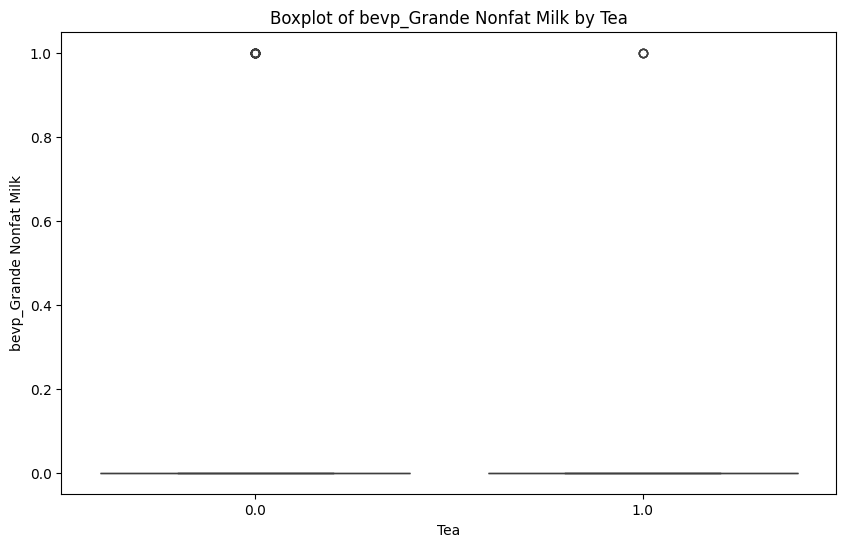

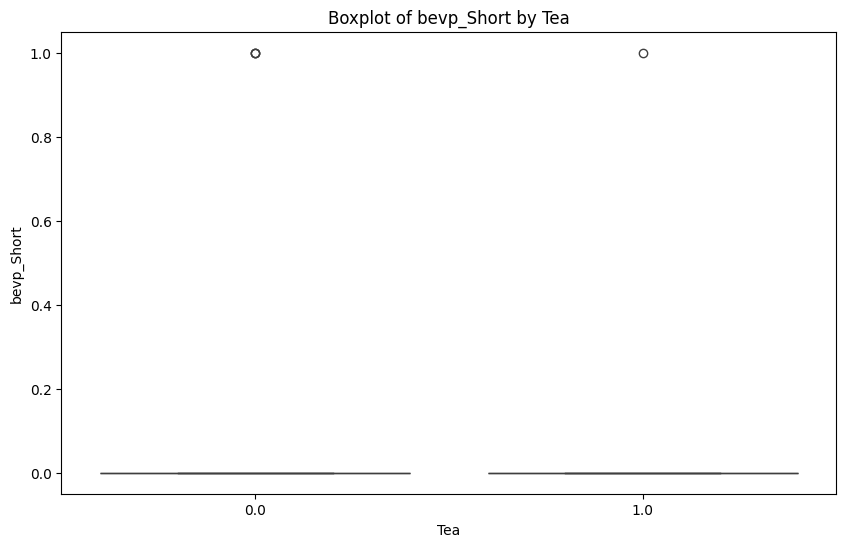

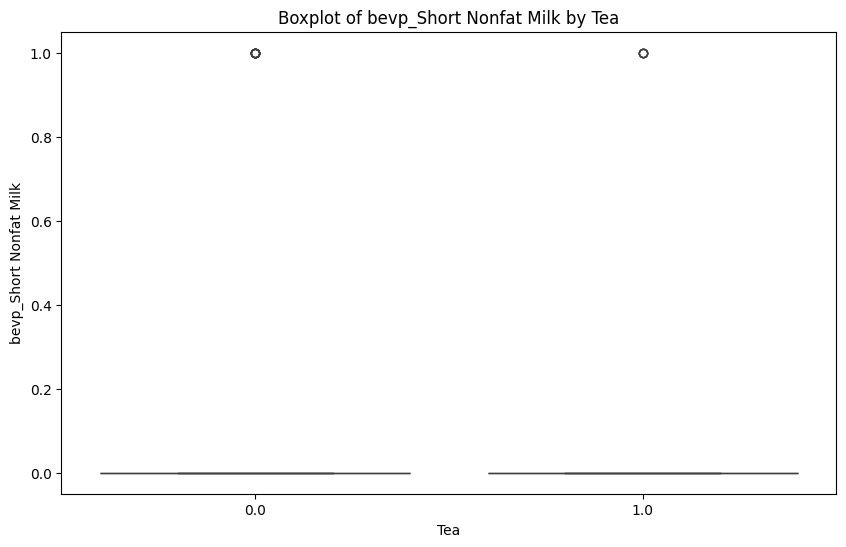

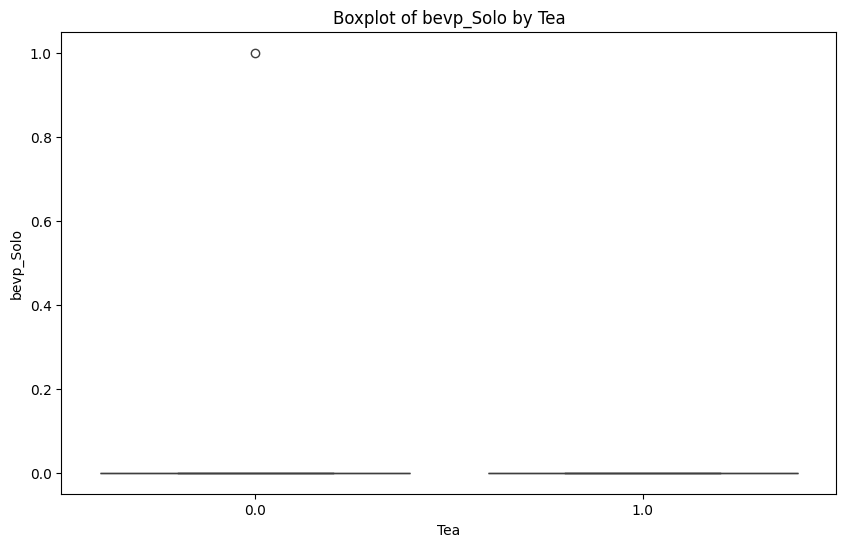

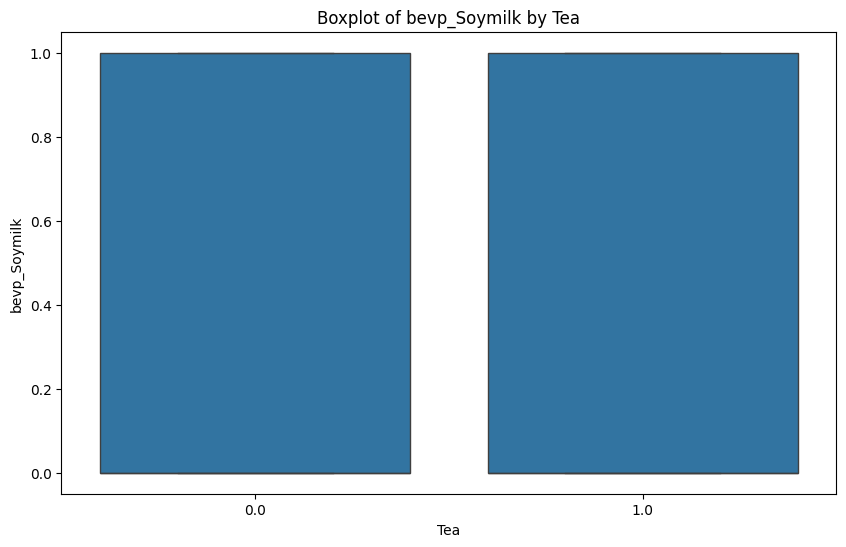

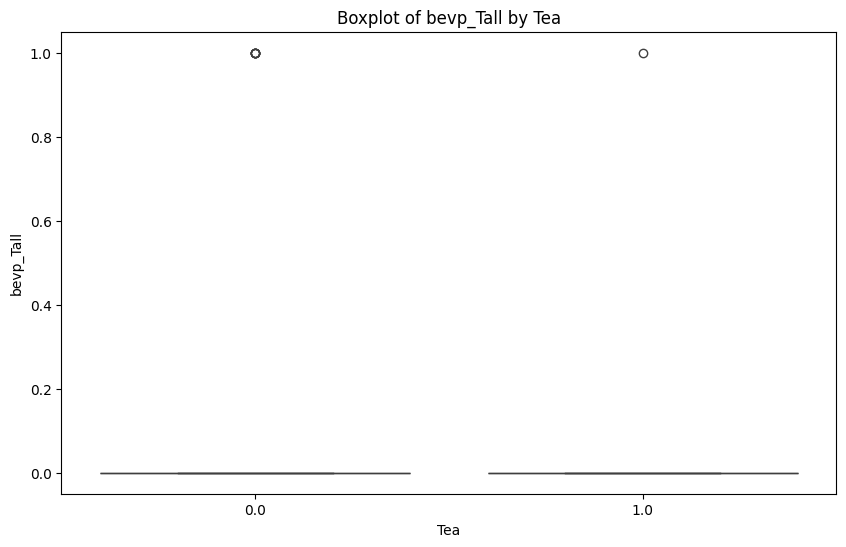

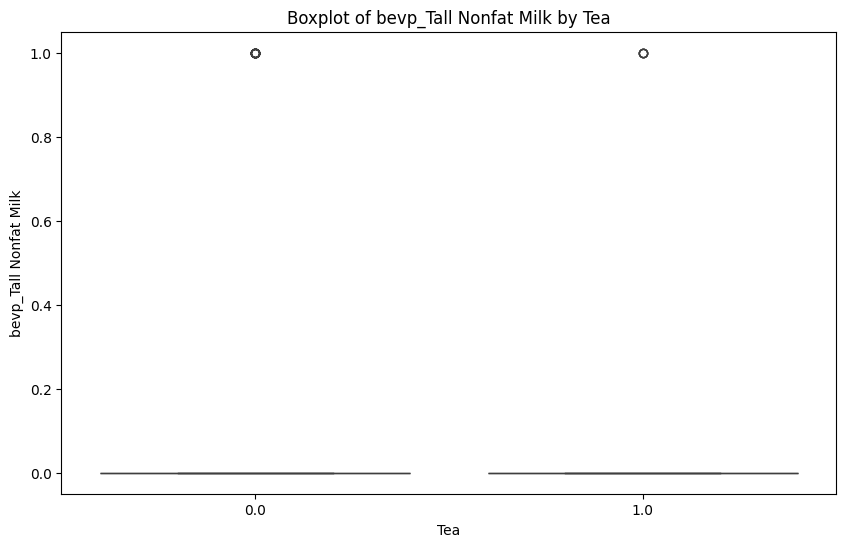

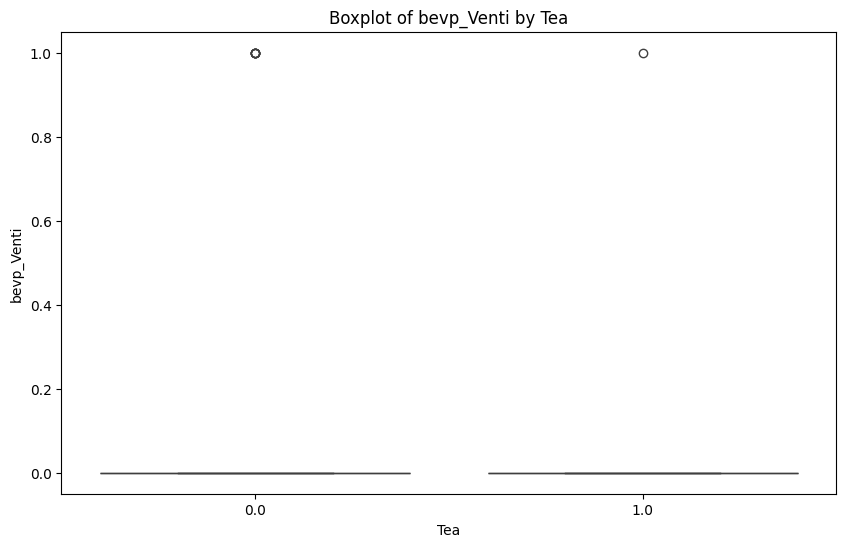

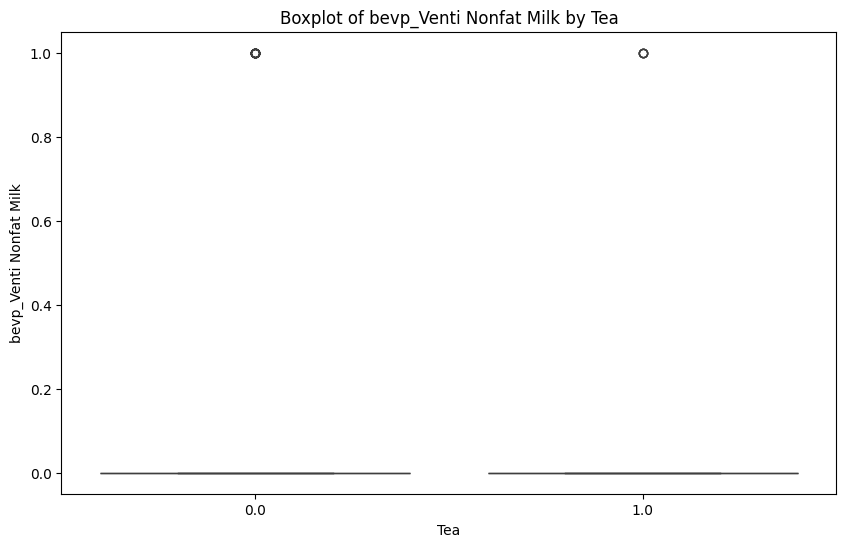

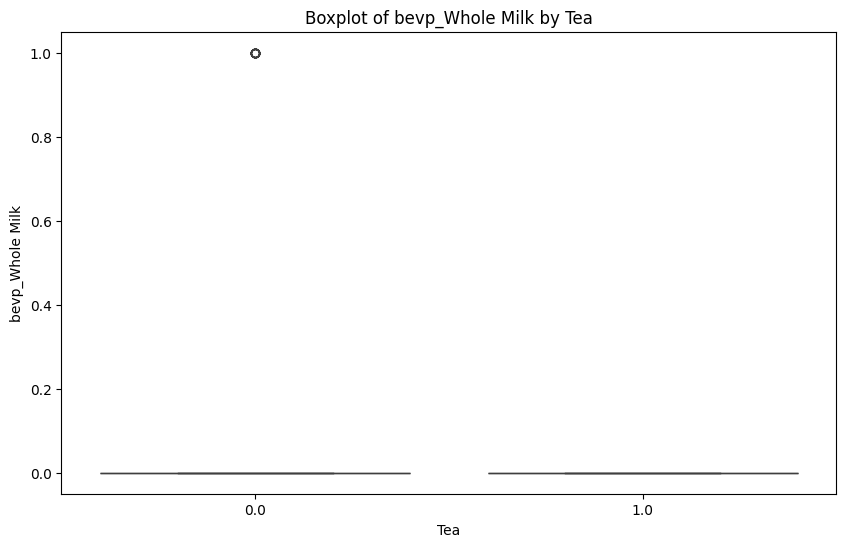

In [48]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
numeric_columns = data.select_dtypes(include='number').columns  # Select only numeric columns
#columns = [carbohydrates,cholestral,calcium.,trans fat,saturated fat,caffeine,iron,bevp_2%]

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tea', y=col, data=data)
    plt.title(f'Boxplot of {col} by Tea')
    plt.show()


**columns = [carbohydrates,cholestral, calcium, trans fat,saturated fat, caffeine, iron,bevp_2%] can act as a potential indicator of tea or not.**

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.